<a href="https://colab.research.google.com/github/GavinButts/Fall-Data-Challenge-2022/blob/main/Code/Kevin/FOYESCNT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#make sure to import csv file into colab and change df = pd.read_csv("CuratedData.csv") to reflect csv name

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sheet_id = "11rno0SjsOyV1JlevH3q40UMm1s5e6m7g"
sheet_name = "curated_2019-required"

url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

df = pd.read_csv(url)

#length of csv
dfLength = 15500

In [25]:
#print(df)
#print(df.SEGRADES)
SEGRADES_no_nongrades = []
for grade in df.SEGRADES:
  if grade == -1 or grade == 5:
    grade = None
  SEGRADES_no_nongrades.append(grade)
df["SEGRADES_no_nongrades"] = SEGRADES_no_nongrades
#print(df.SEGRADES)
print(df.SEGRADES_no_nongrades)

2


In [26]:
#create FOYESCNT variable that determines the amount of times each person said 'Yes' on the FO#### questions (ITEMS 72-74)
#Legend:  Number of 'Yes'

FOYESCNT = []      #variable that will be added to csv
yesCount = 0
FOYESCNT_LMH = []
for i in range(15500):
  if df['FOSTORY2X'][i] == 1:
    yesCount += 1
  if df['FOCRAFTS'][i] == 1:
    yesCount += 1
  if df['FOGAMES'][i] == 1:
    yesCount += 1
  if df['FOBUILDX'][i] == 1:
    yesCount += 1
  if df['FOSPORT'][i] == 1:
    yesCount += 1
  if df['FORESPON'][i] == 1:
    yesCount += 1
  if df['FOHISTX'][i] == 1:
    yesCount += 1
  if df['FOLIBRAYX'][i] == 1:
    yesCount += 1
  if df['FOBOOKSTX'][i] == 1:
    yesCount += 1
  if df['FODINNERX'][i] != 0:
    yesCount += 1
  FOYESCNT.append(yesCount)
  if yesCount <= 3:
    FOYESCNT_LMH.append('1) LOW INVOLVMENT')
  elif yesCount > 3 and yesCount<=7:
    FOYESCNT_LMH.append('2) MEDIUM INVOLVEMENT')
  elif yesCount > 7:
    FOYESCNT_LMH.append('3) HIGH INVOLVEMENT')
  yesCount = 0

df["FOYESCNT"] = FOYESCNT
df["FOYESCNT_LMH"] = FOYESCNT_LMH
df.to_csv("sample.csv", index=False)  #adds variable to csv

0        2) MEDIUM INVOLVEMENT
1        2) MEDIUM INVOLVEMENT
2        2) MEDIUM INVOLVEMENT
3          3) HIGH INVOLVEMENT
4        2) MEDIUM INVOLVEMENT
                 ...          
15495    2) MEDIUM INVOLVEMENT
15496    2) MEDIUM INVOLVEMENT
15497    2) MEDIUM INVOLVEMENT
15498      3) HIGH INVOLVEMENT
15499    2) MEDIUM INVOLVEMENT
Name: FOYESCNT_LMH, Length: 15500, dtype: object


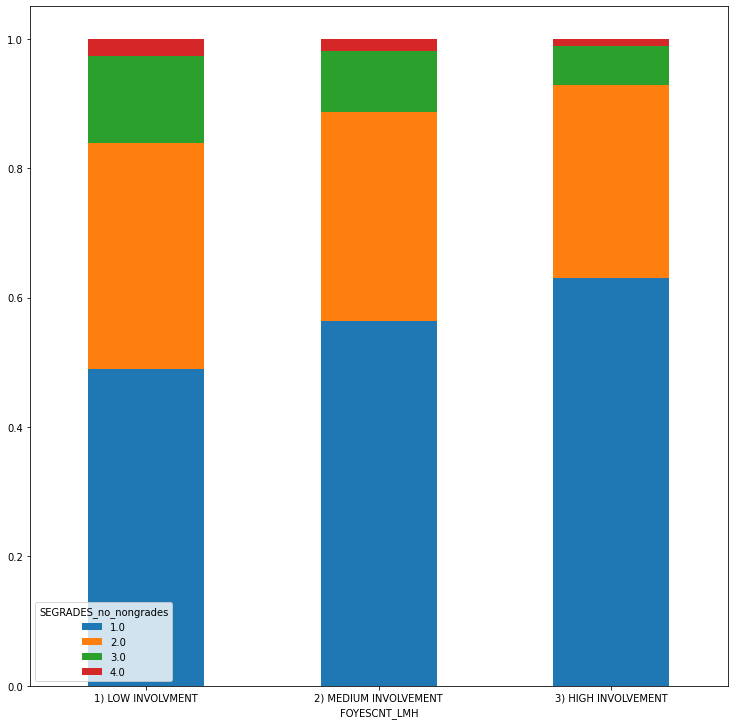

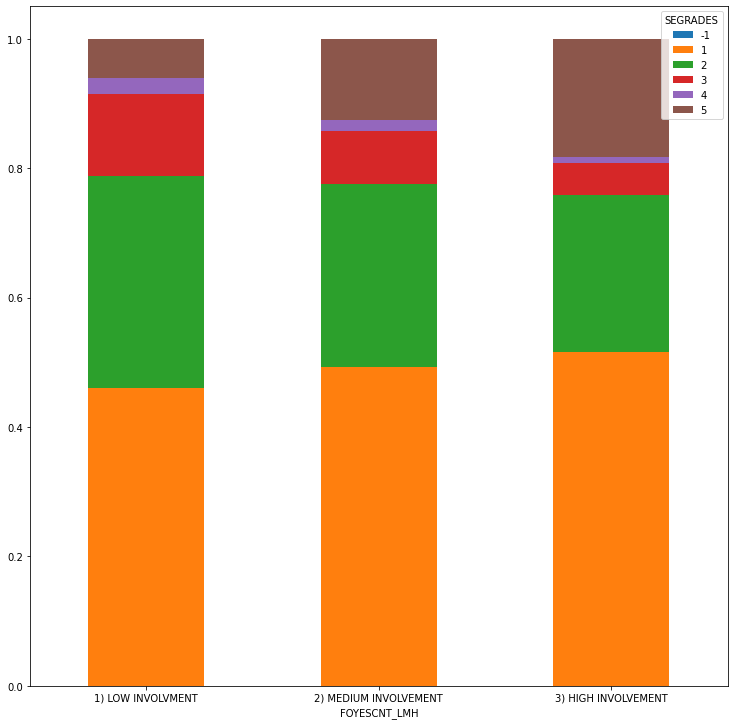

In [28]:
#SEGRADES_no_nongrades
crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df["SEGRADES_no_nongrades"], normalize = "index")
barplot = crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)

crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df["SEGRADES"], normalize = "index")
barplot = crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)


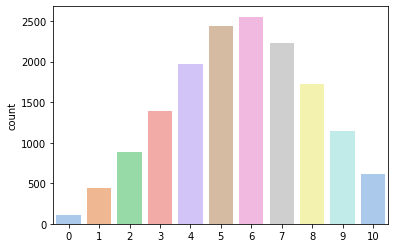

In [4]:
#Question: How many times did you say 'Yes' to FO questions (ITEMS 72-74)
#Legend:  Number of 'Yes'
FSYESCNT = []
for element in df["FOYESCNT"]:
    if element != -1:
      FSYESCNT.append(element)

        
res = sns.countplot(x=FSYESCNT, palette="pastel")

ValueError: ignored

<Figure size 900x900 with 1 Axes>

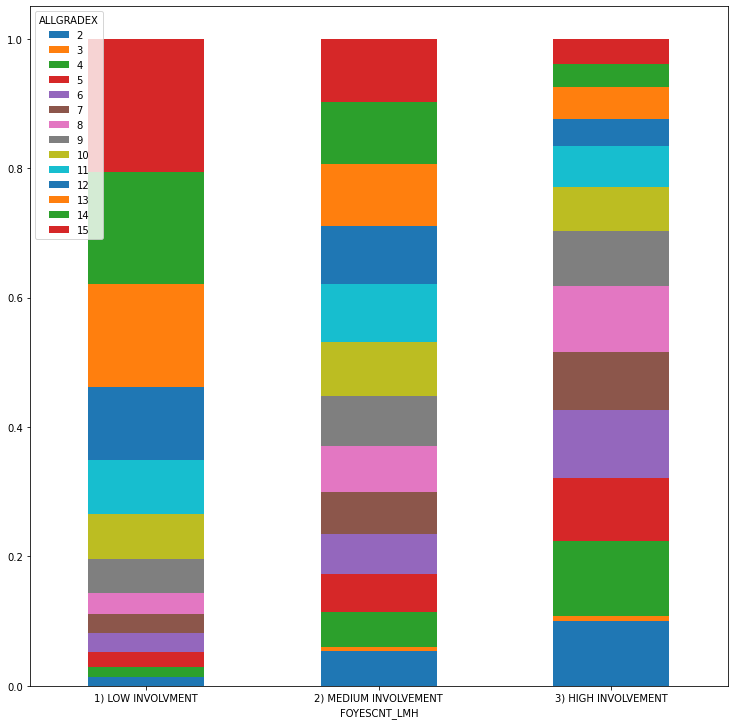

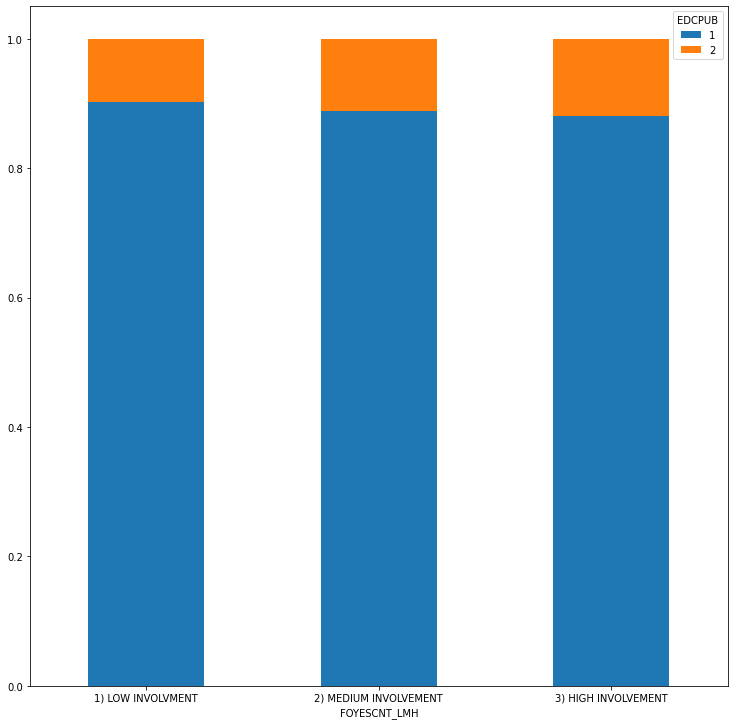

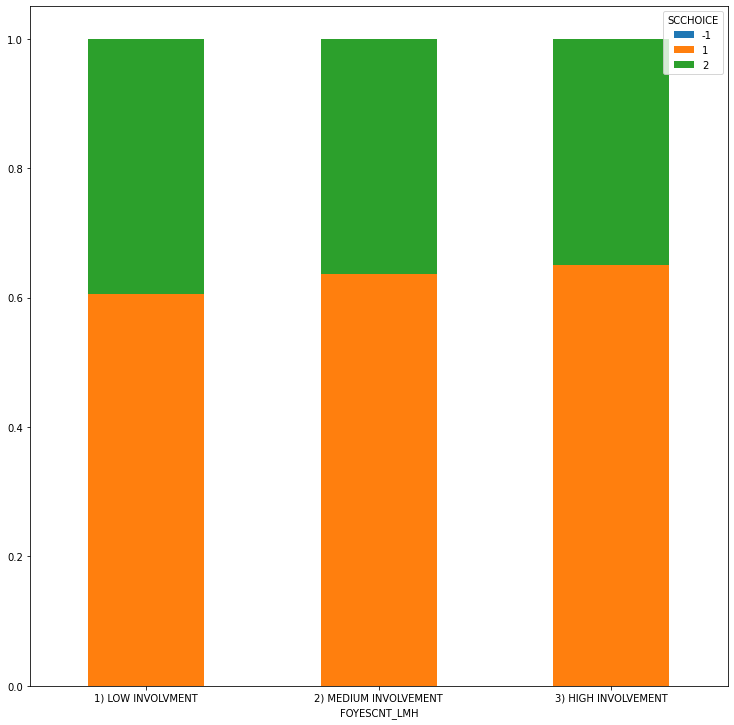

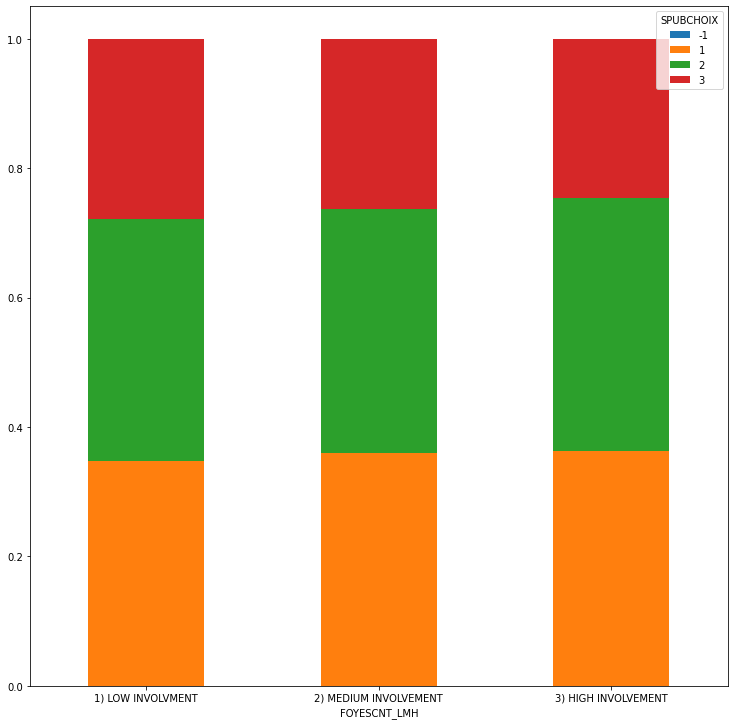

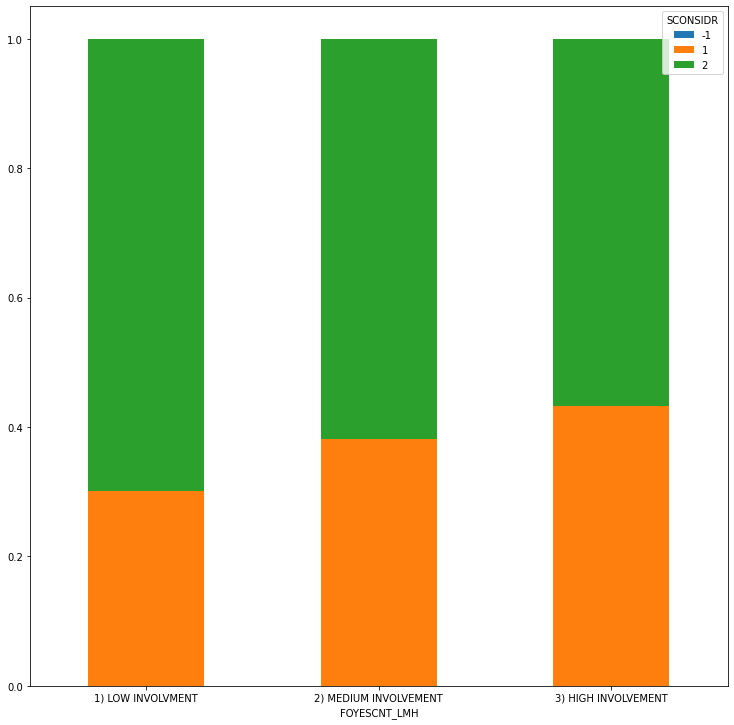

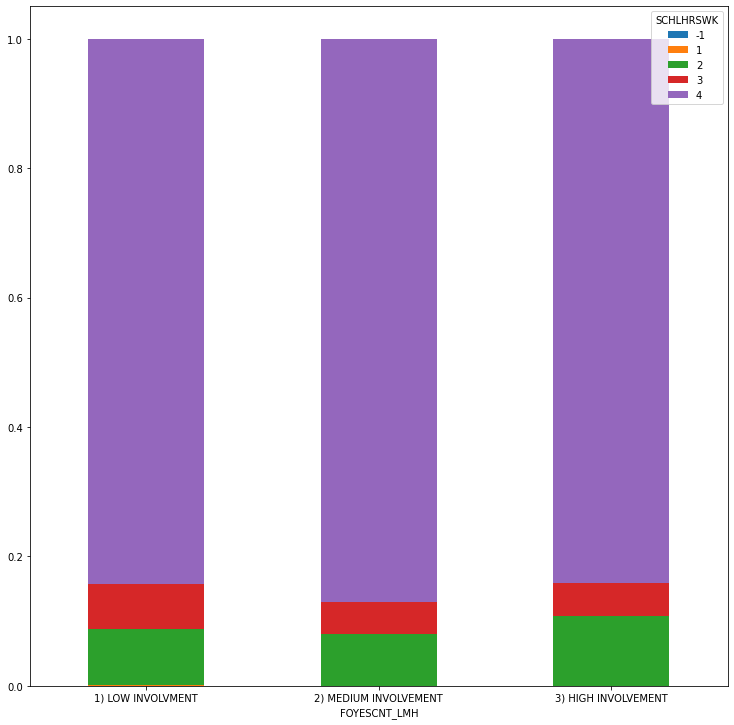

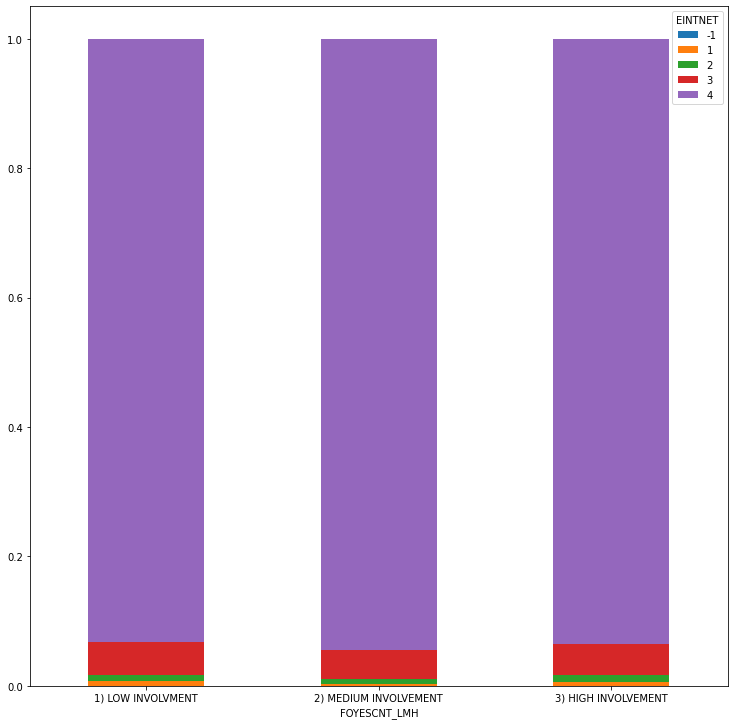

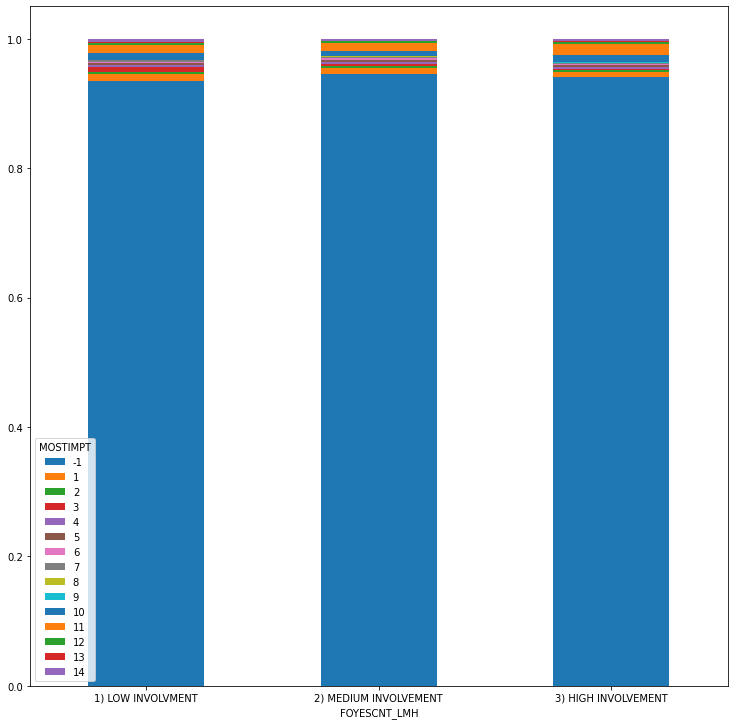

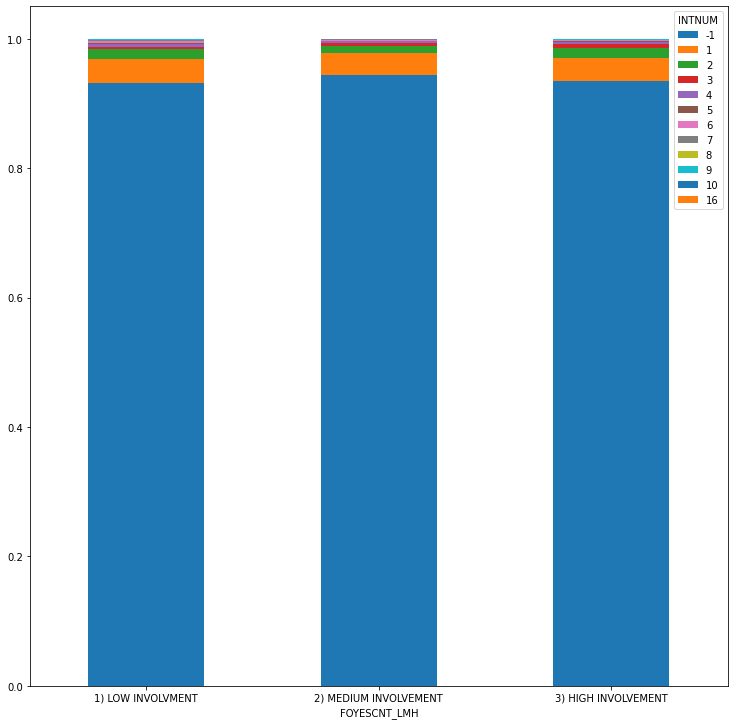

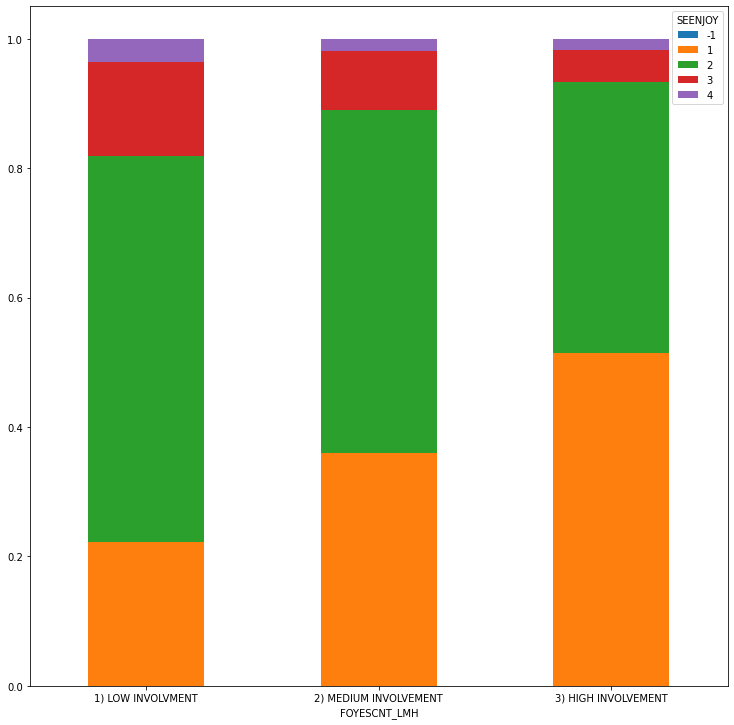

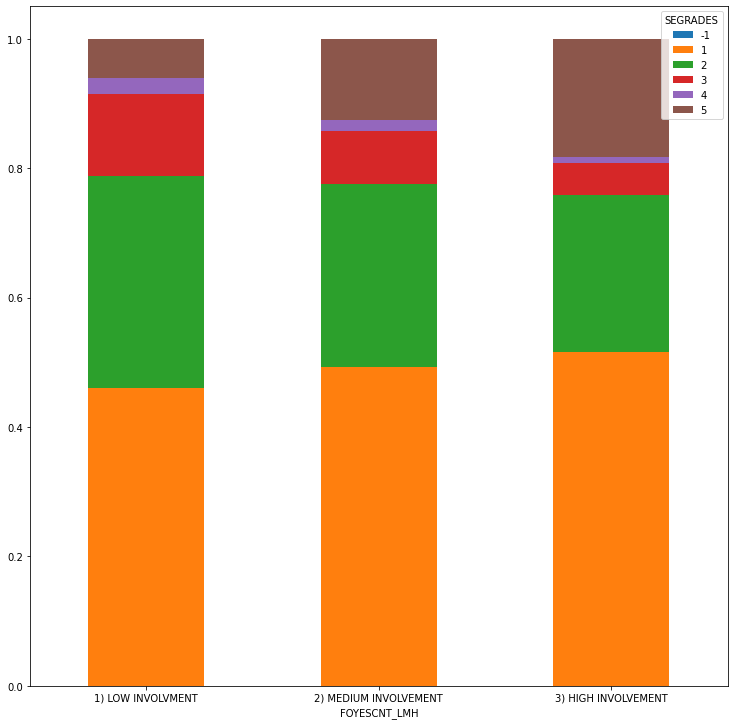

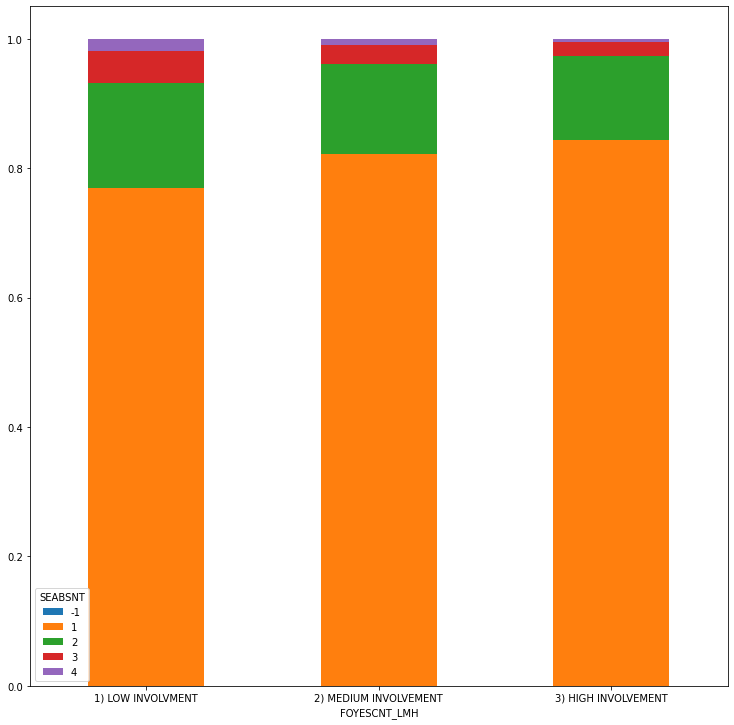

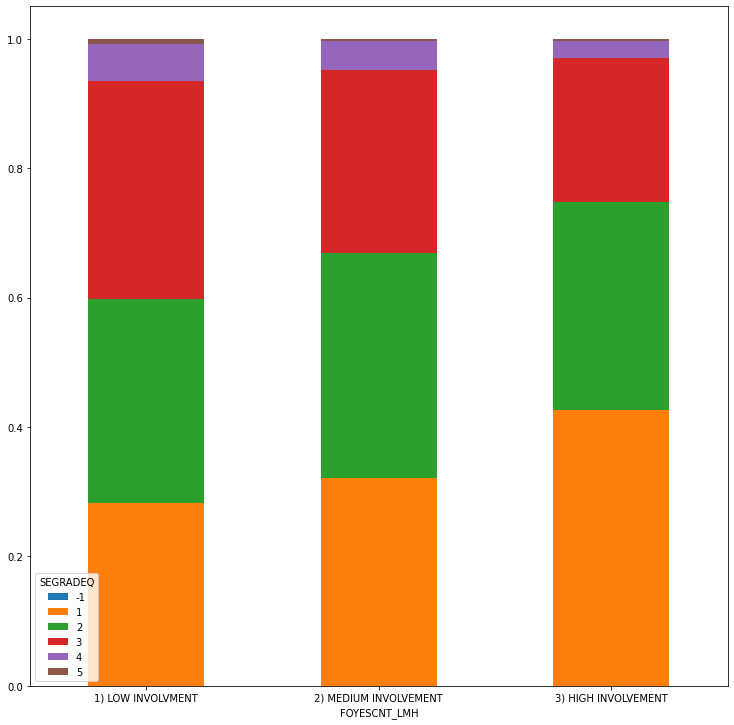

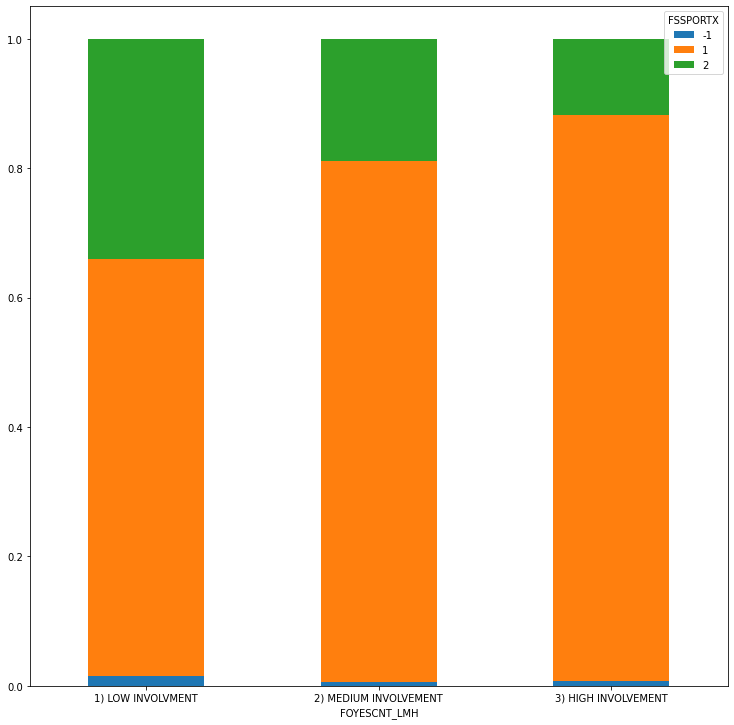

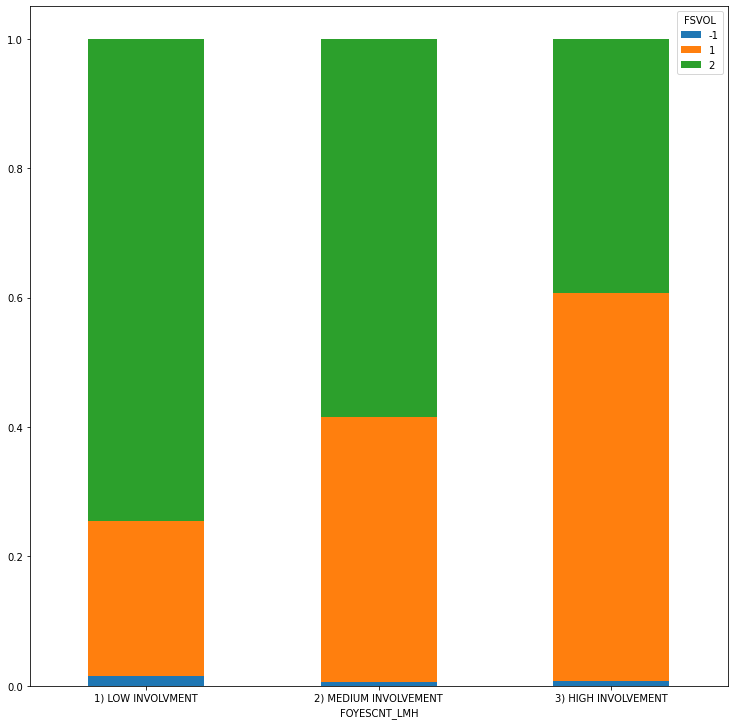

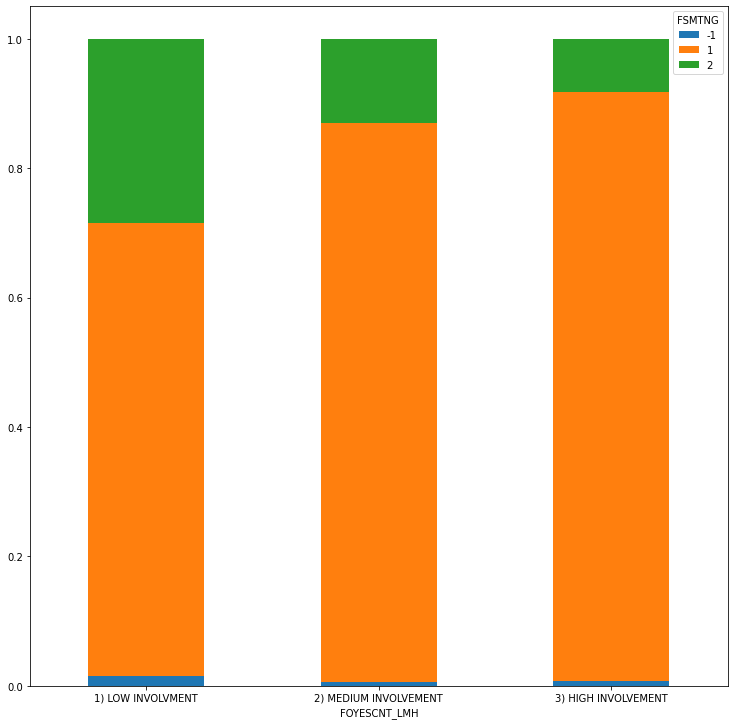

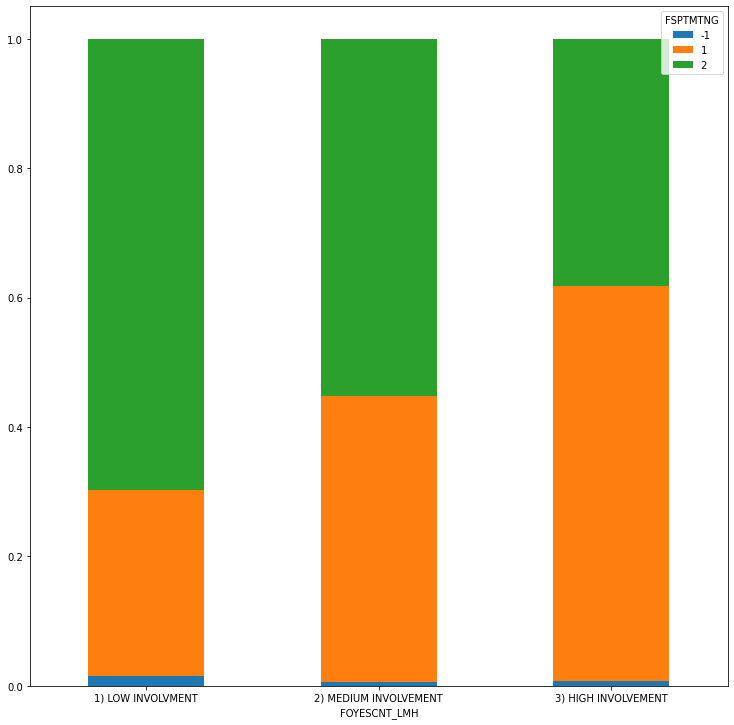

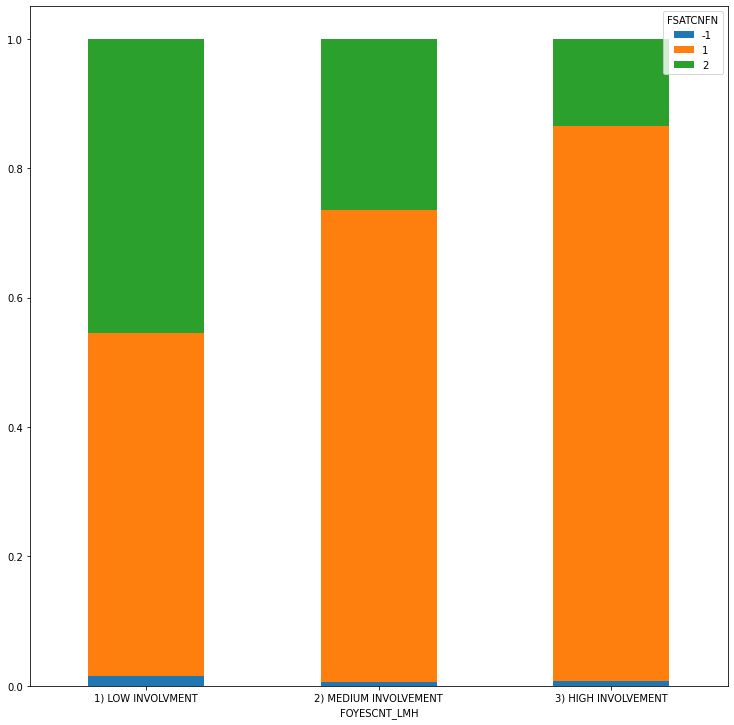

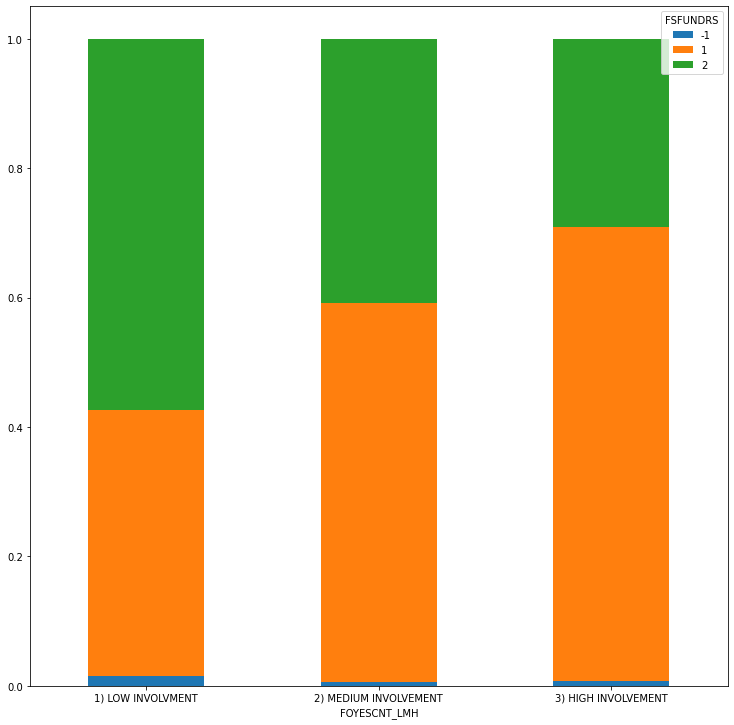

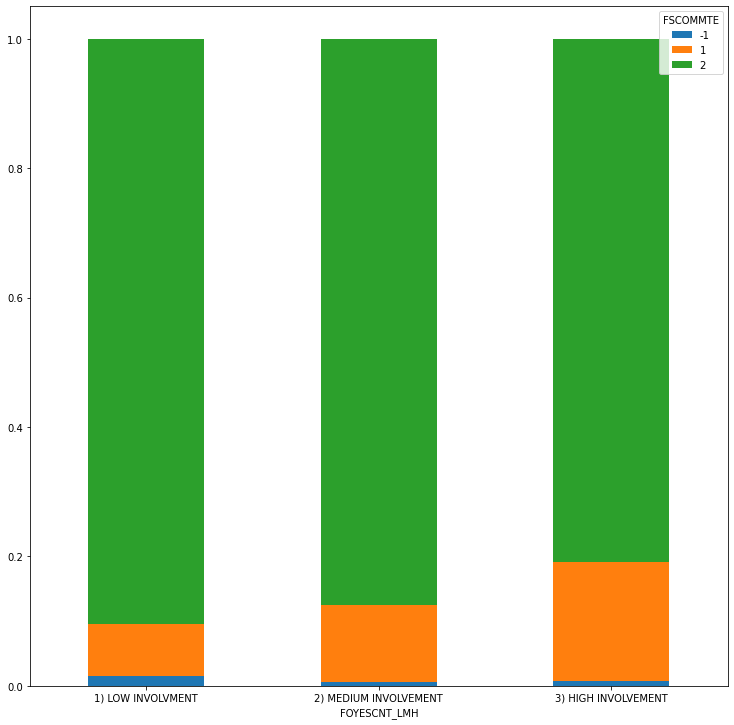

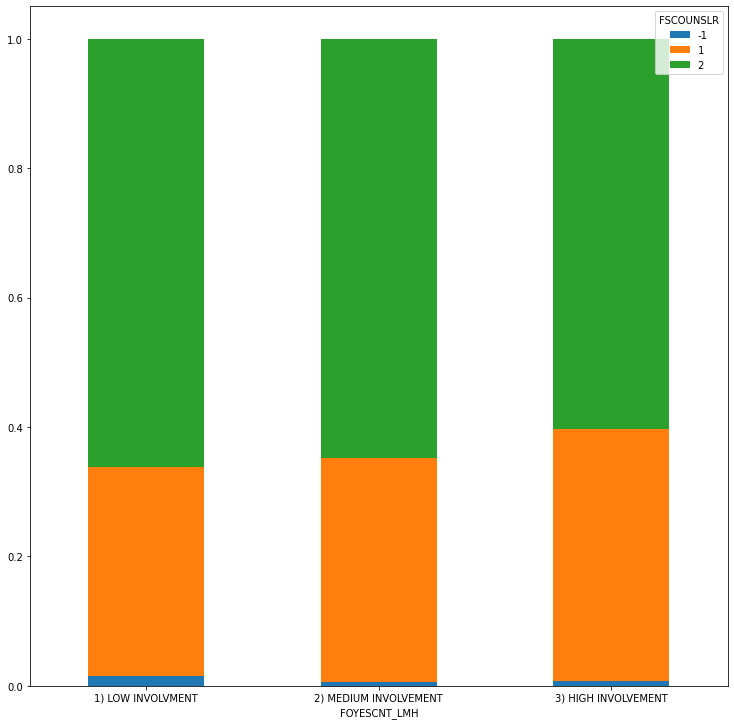

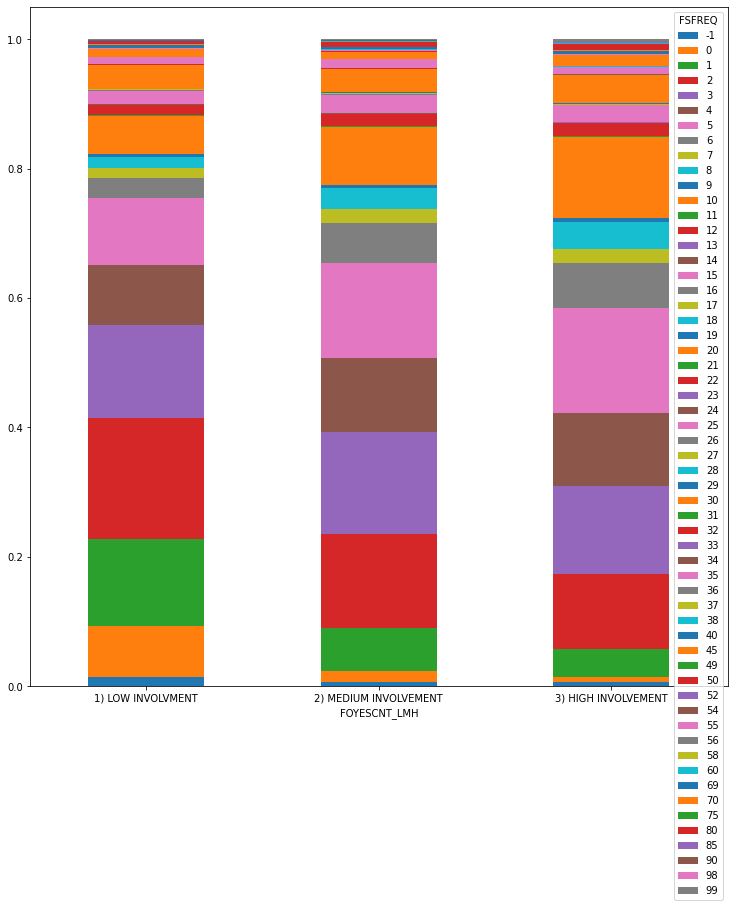

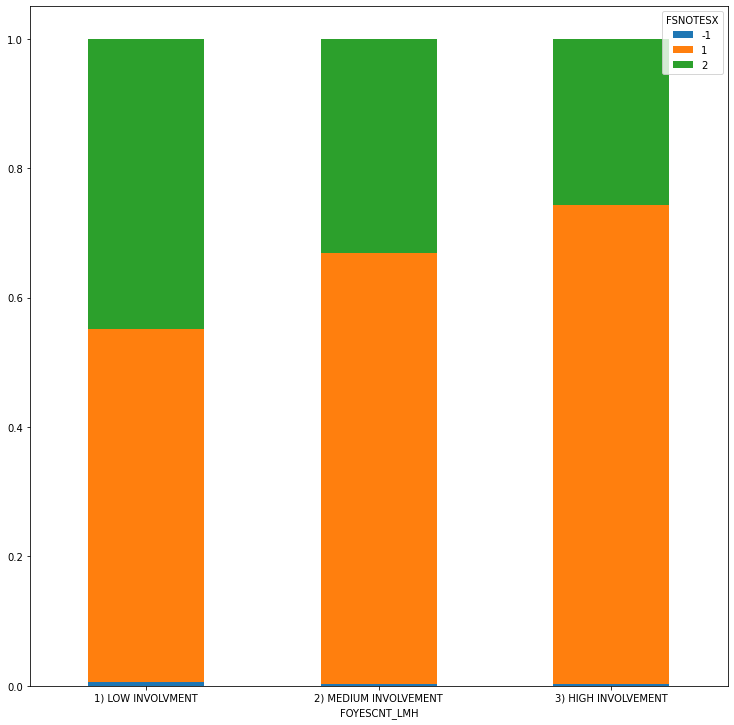

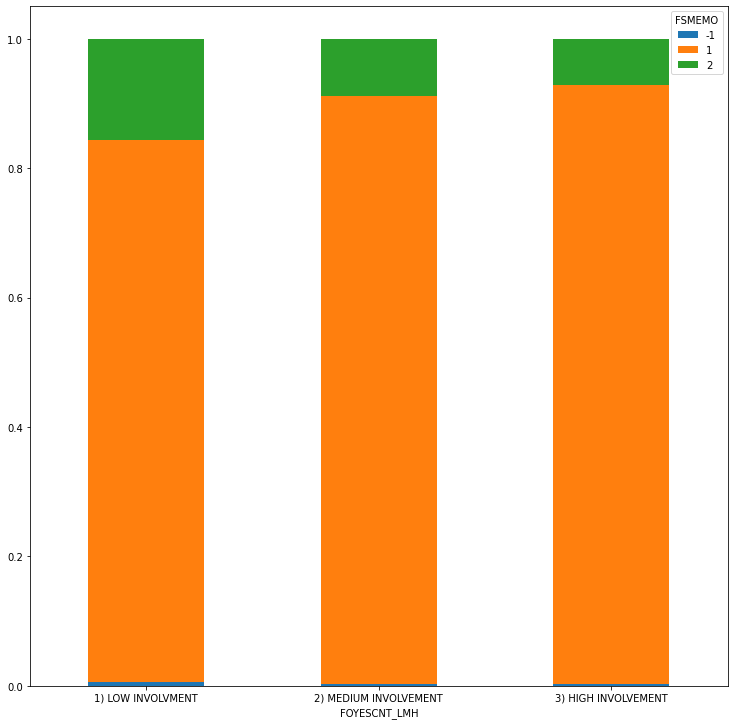

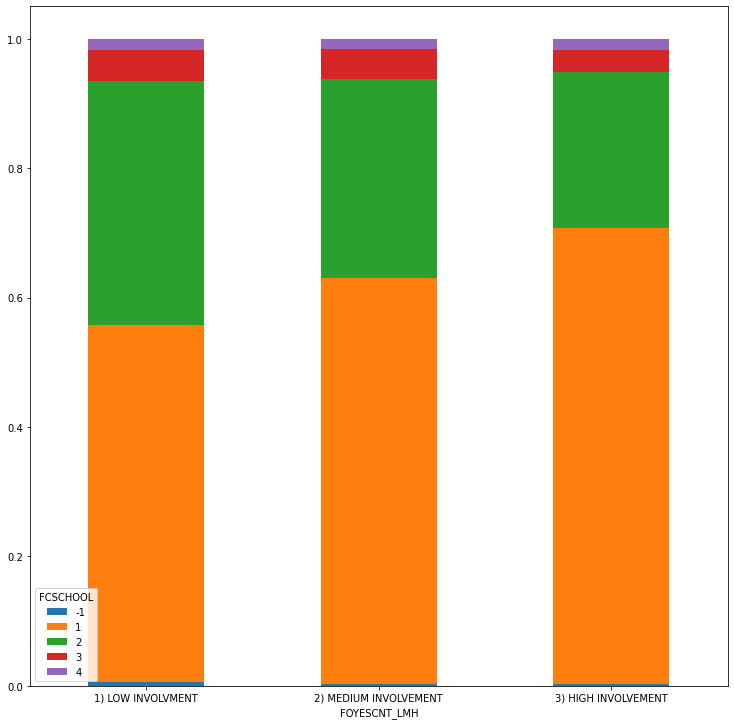

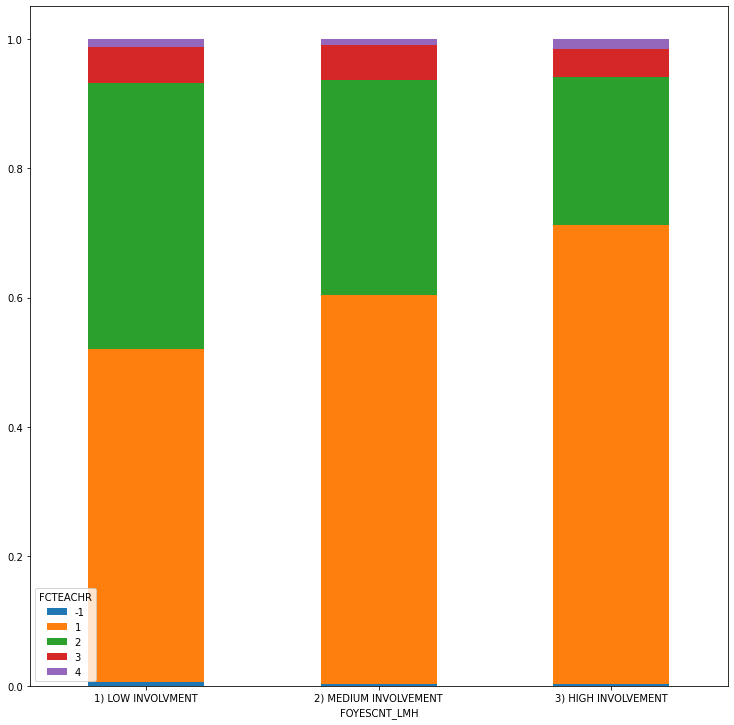

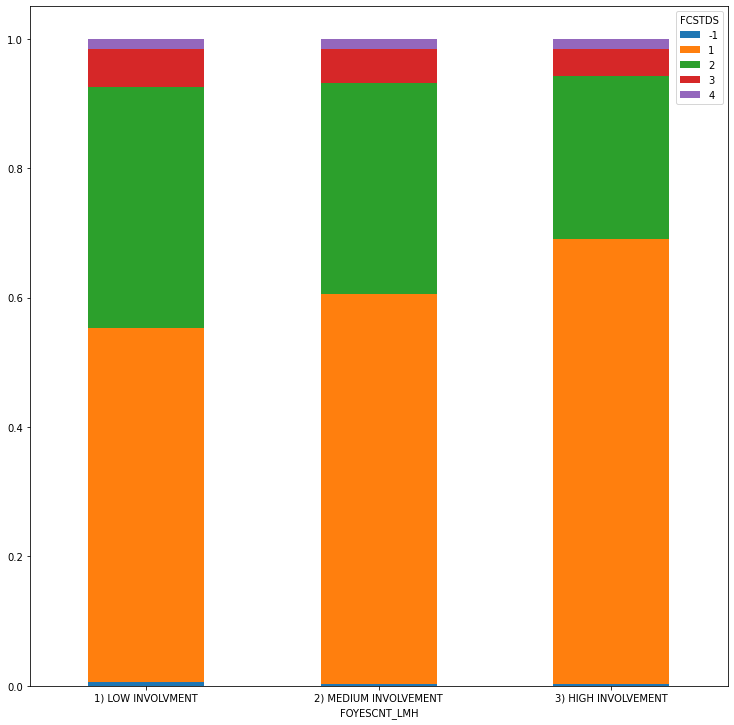

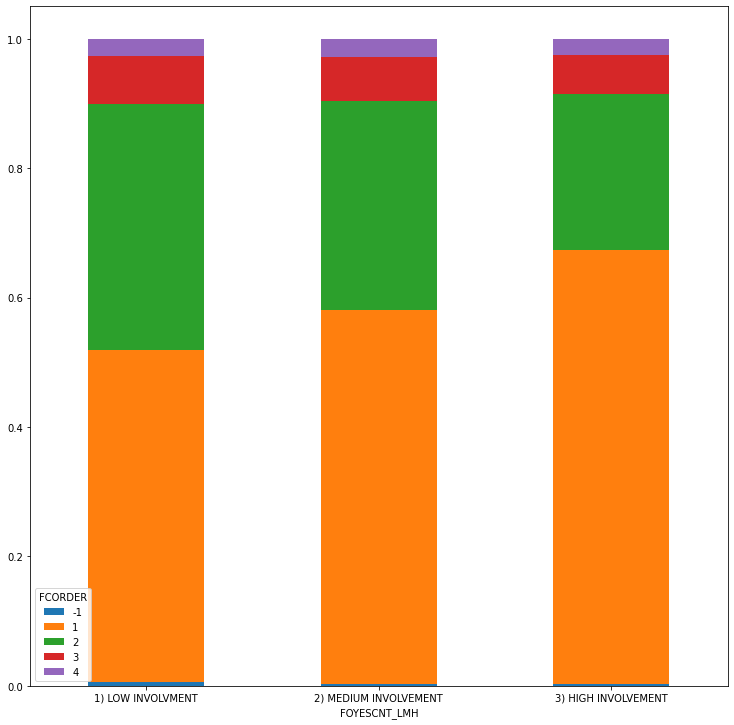

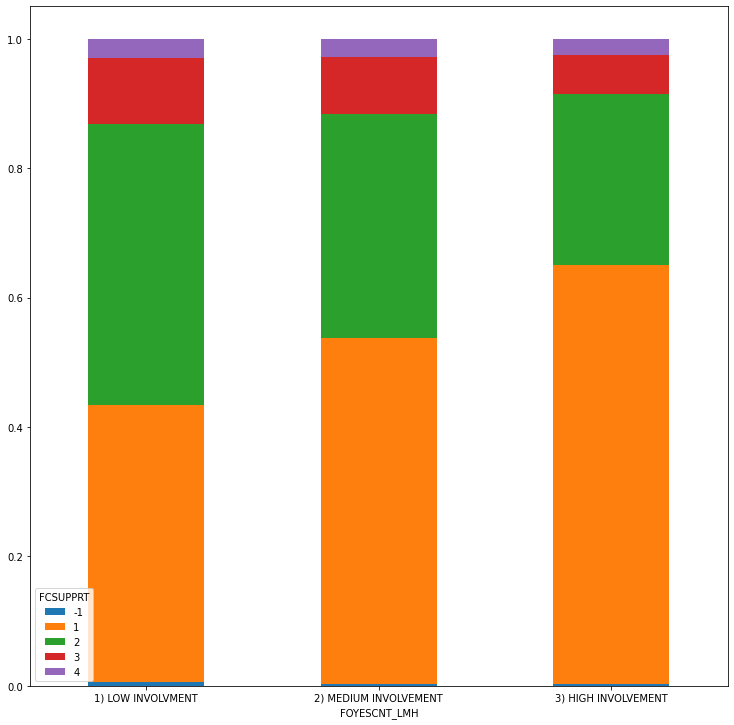

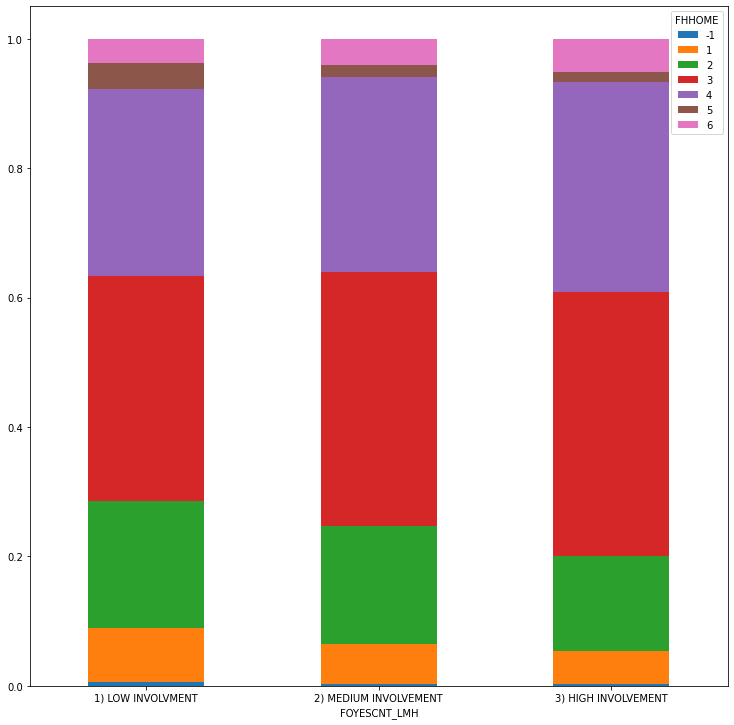

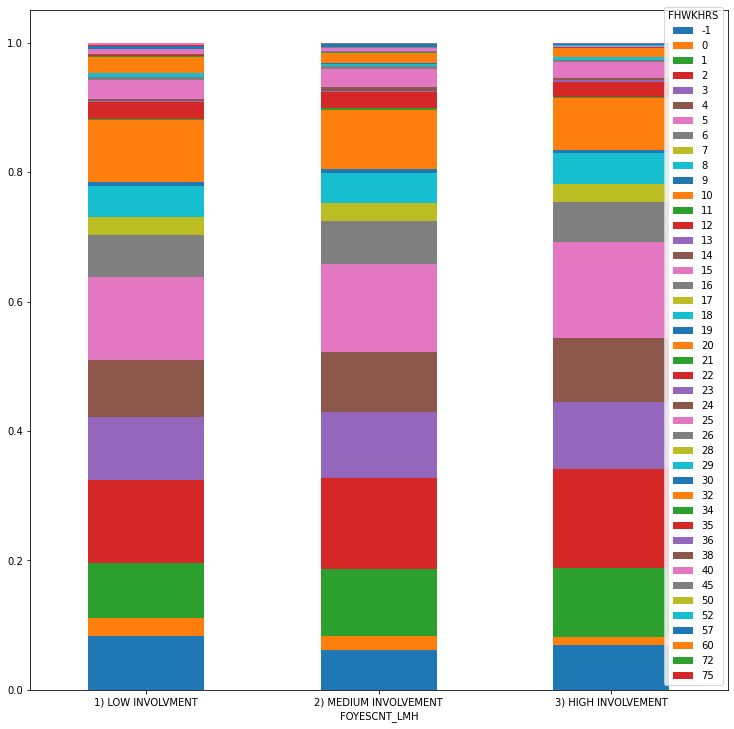

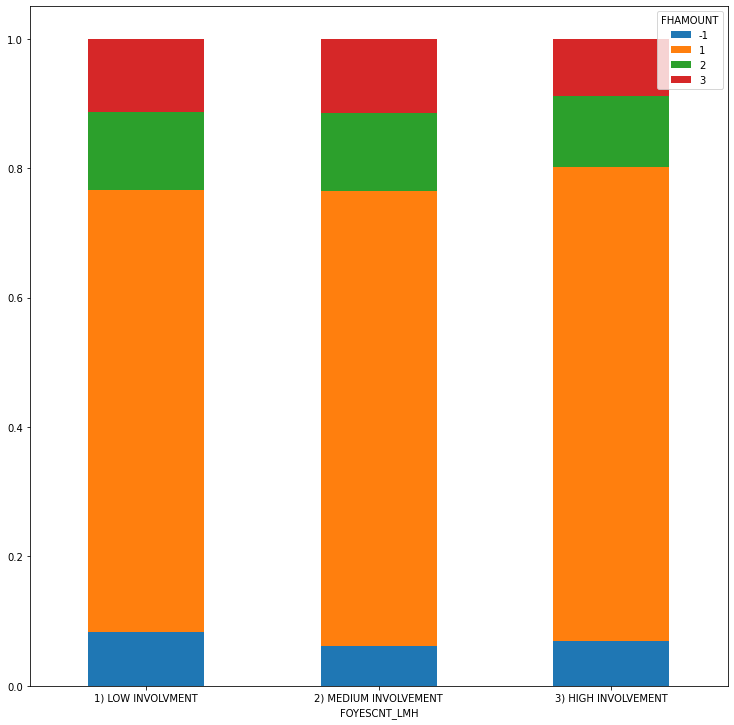

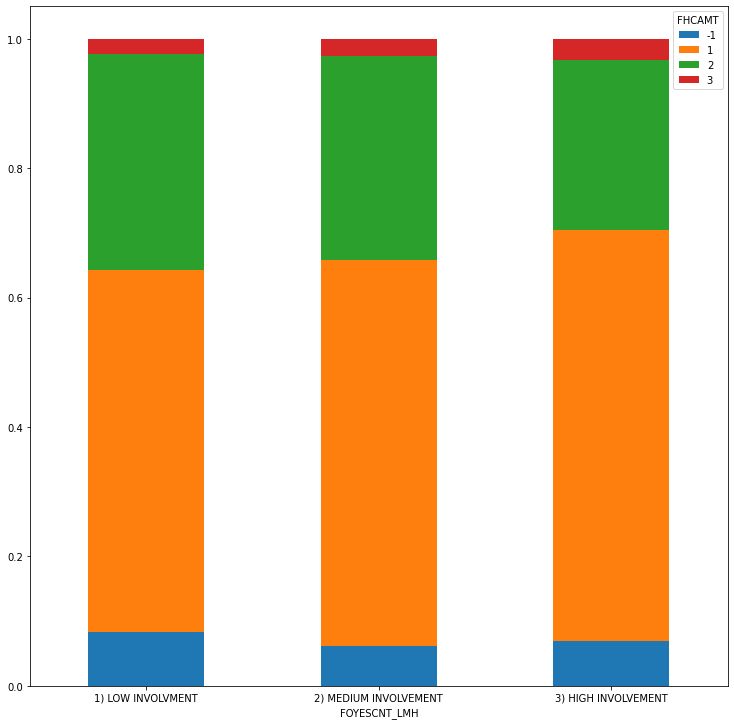

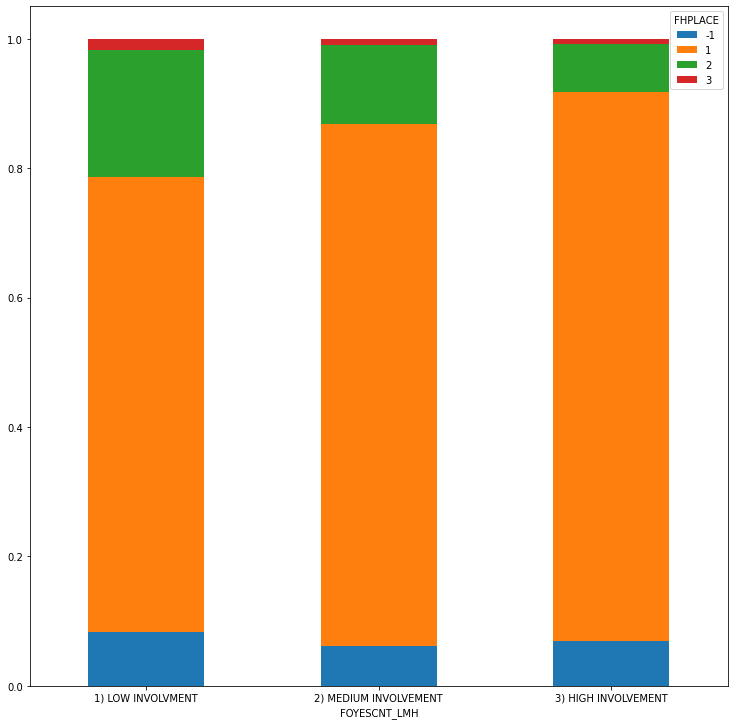

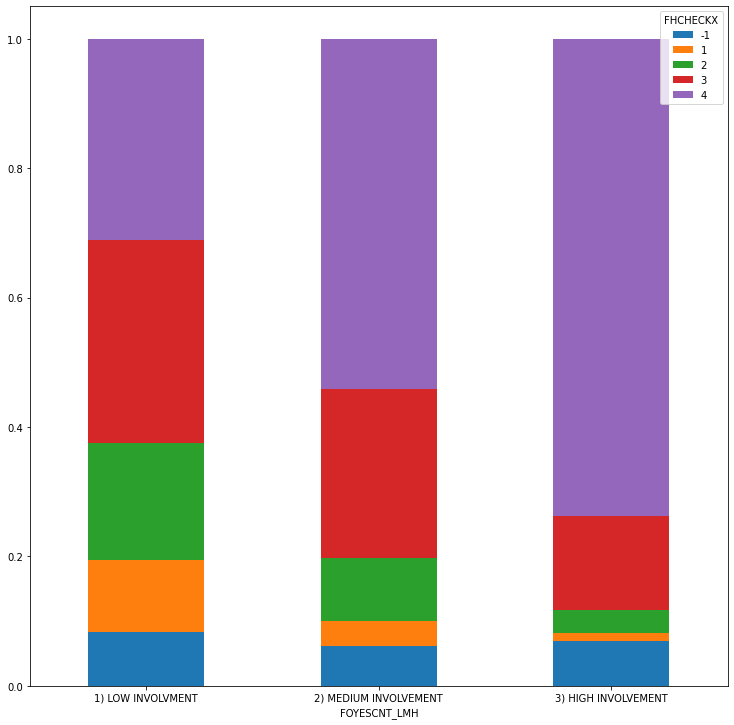

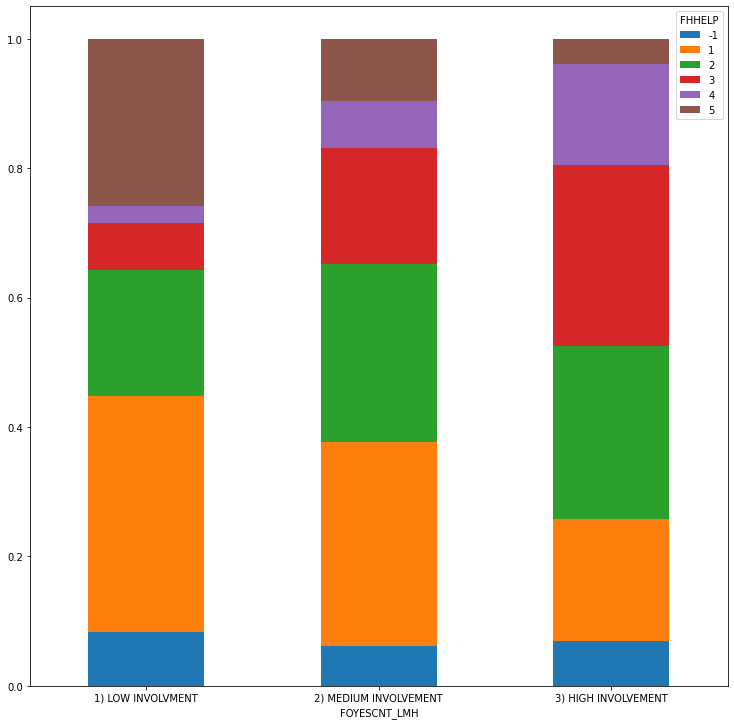

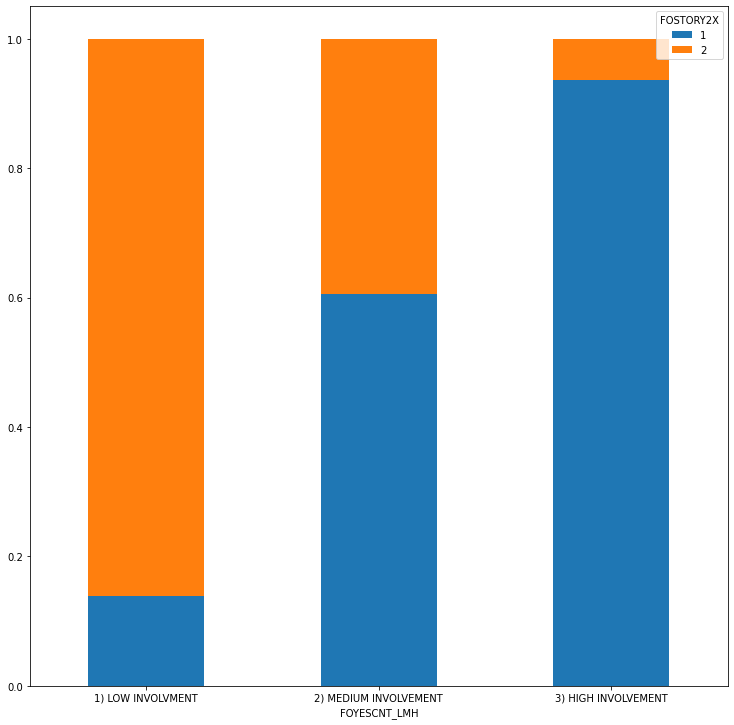

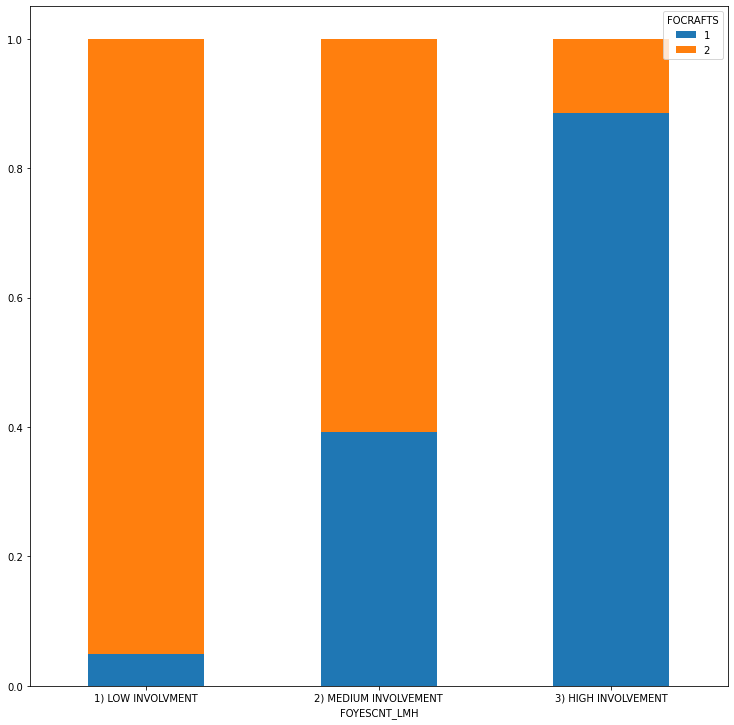

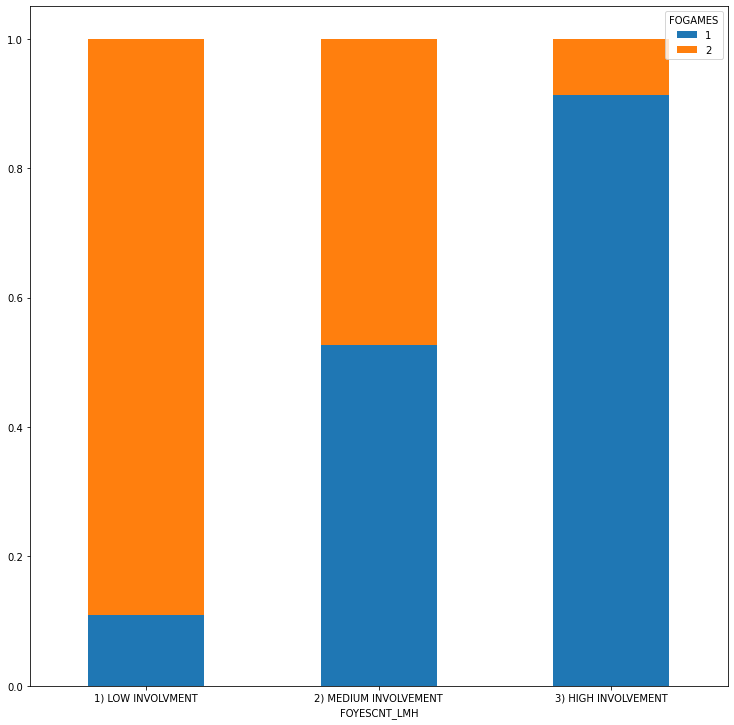

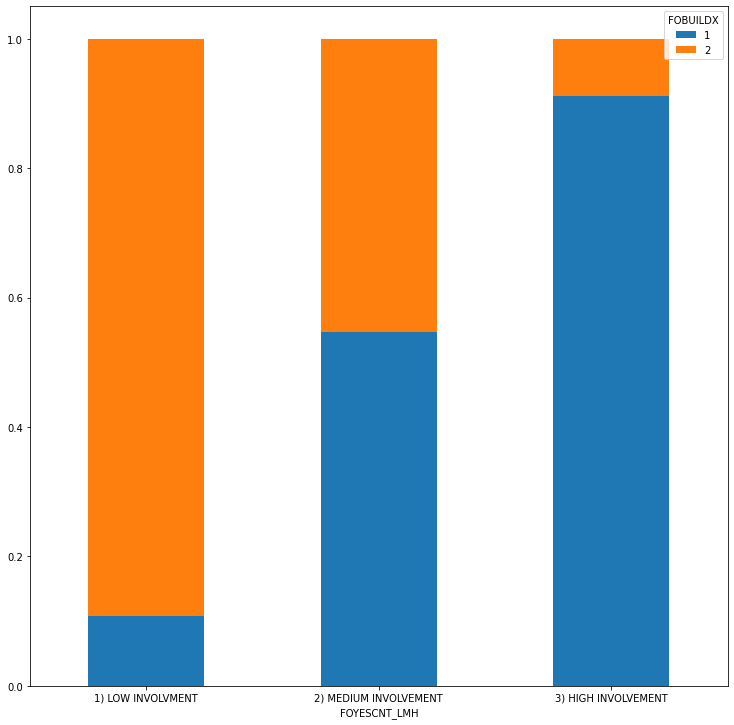

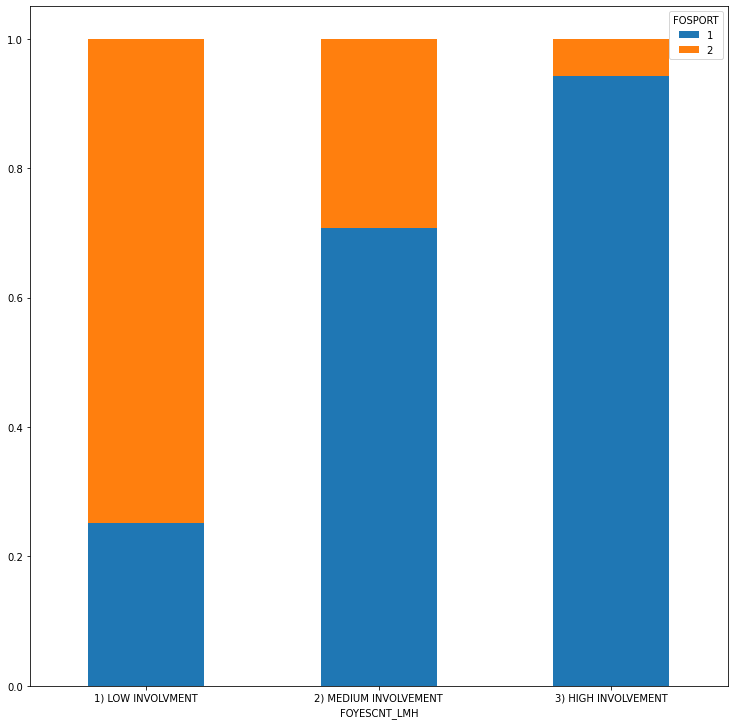

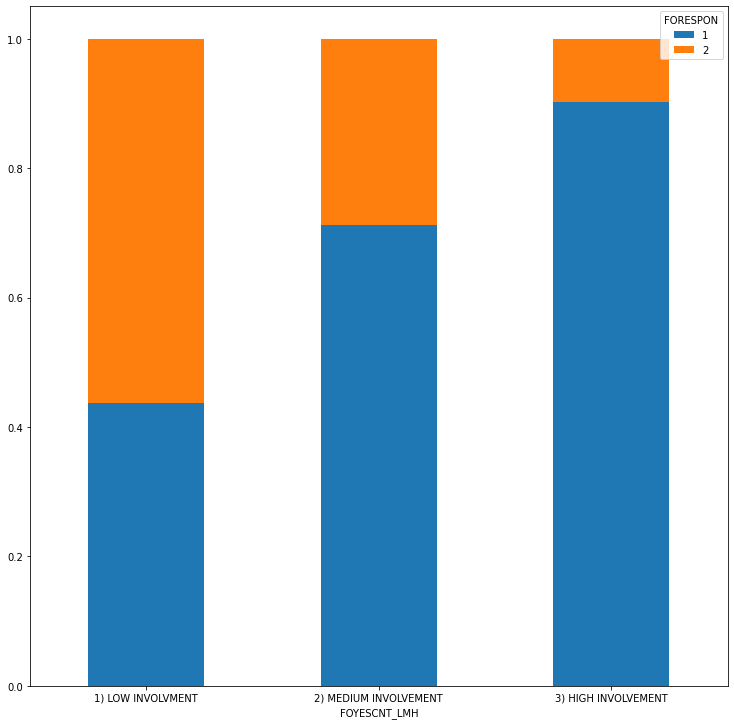

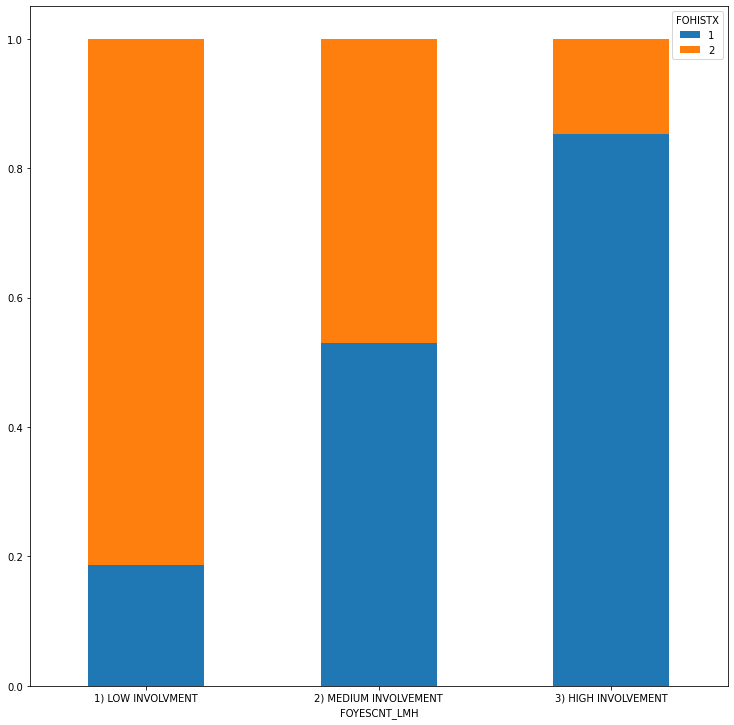

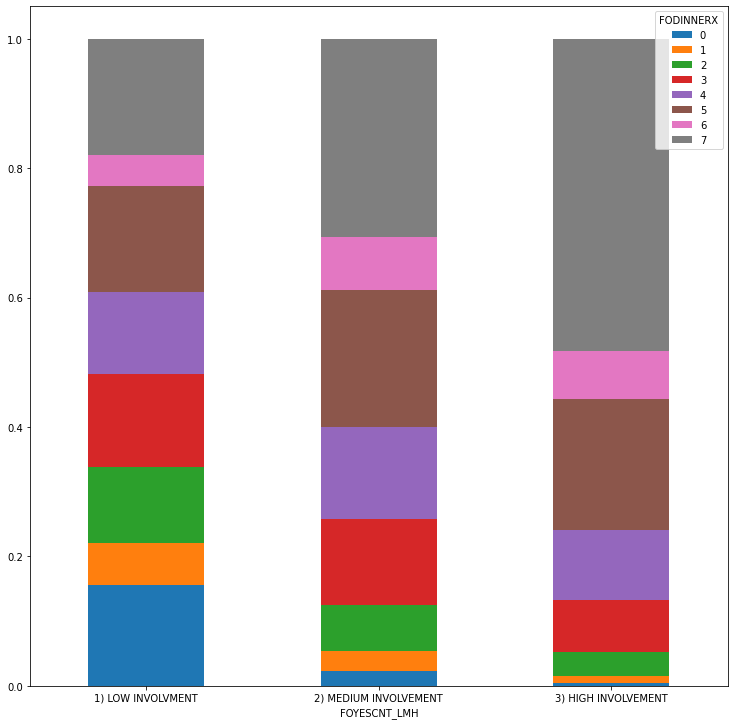

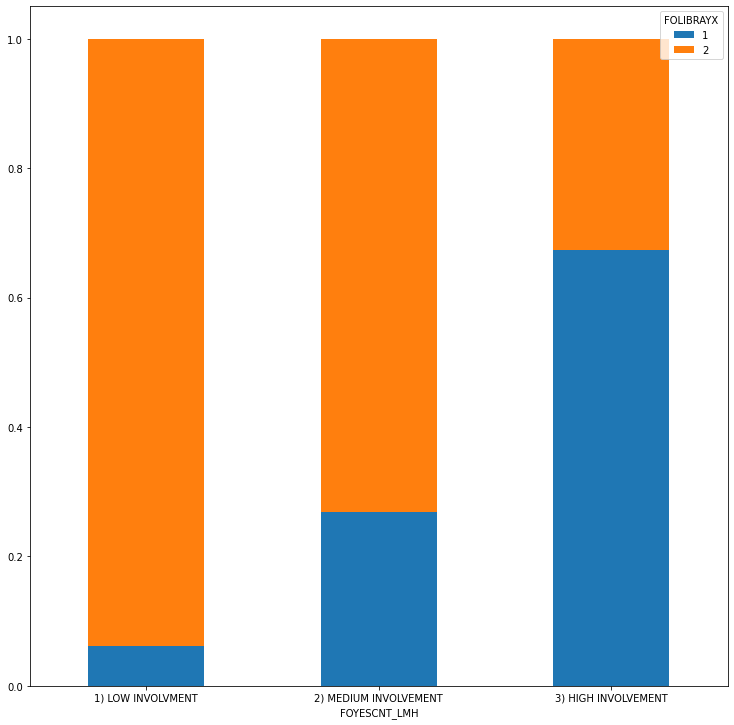

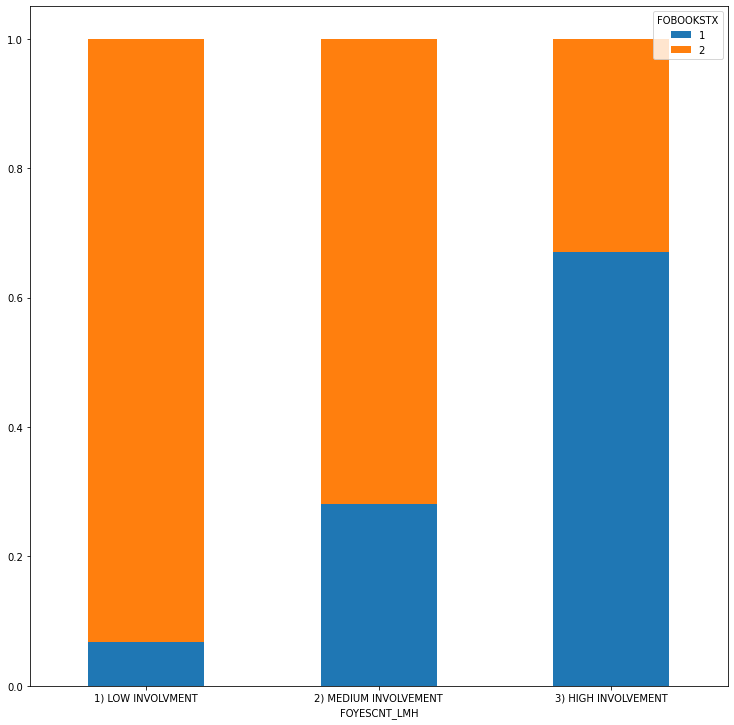

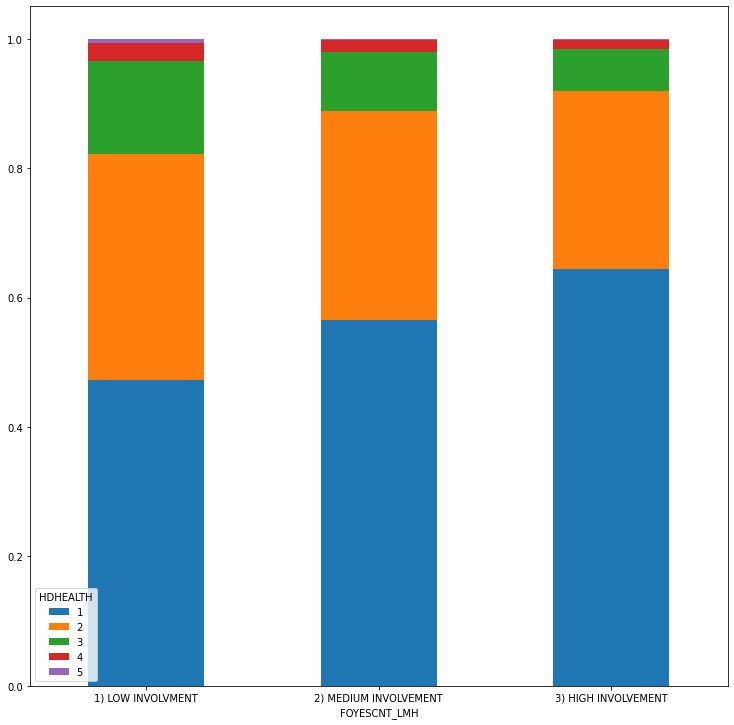

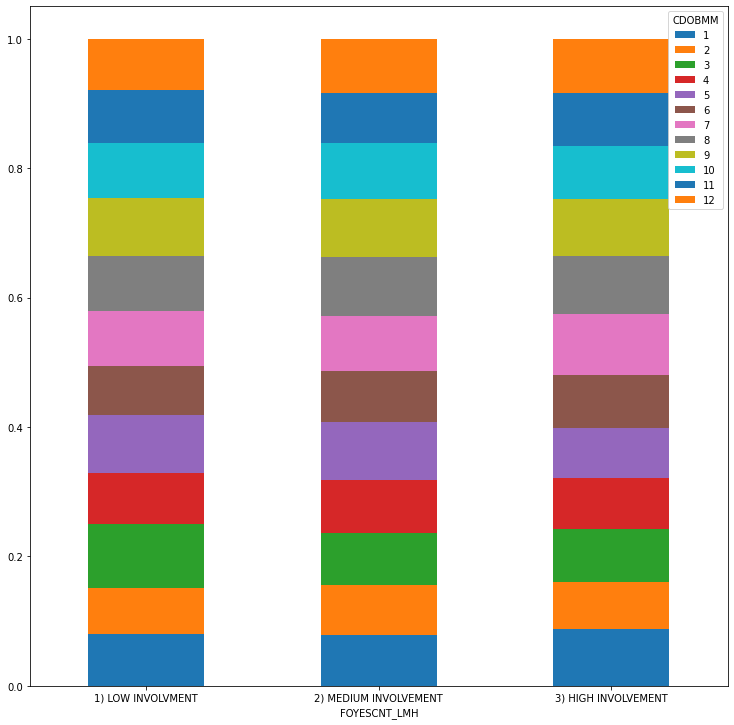

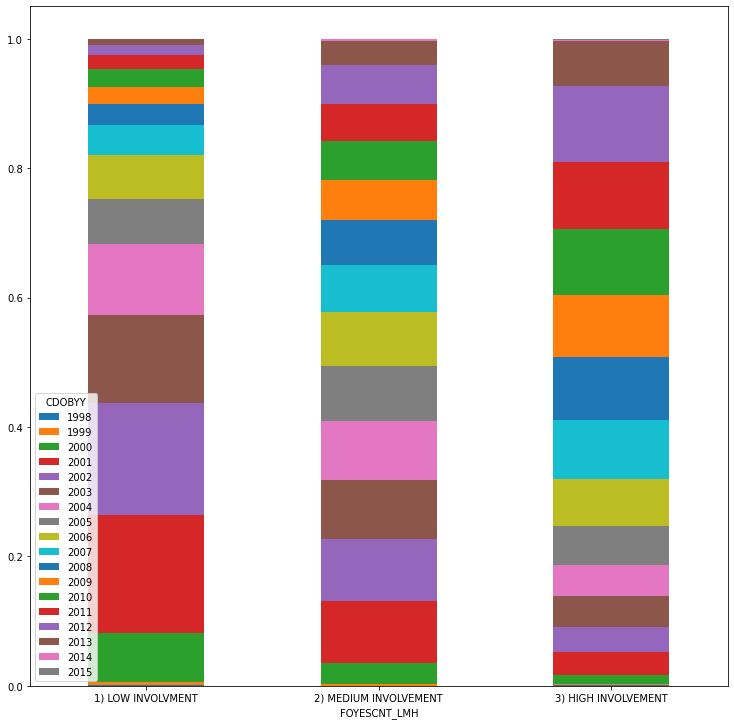

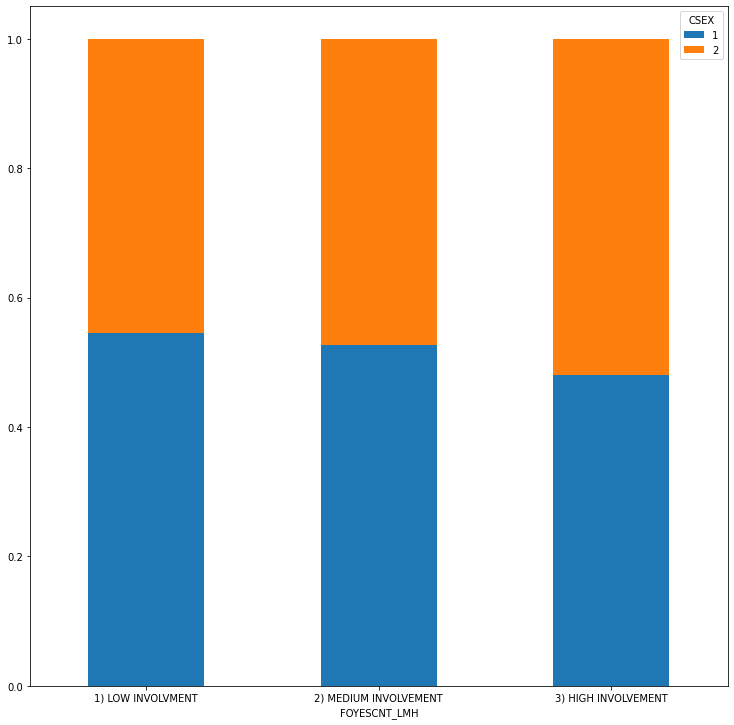

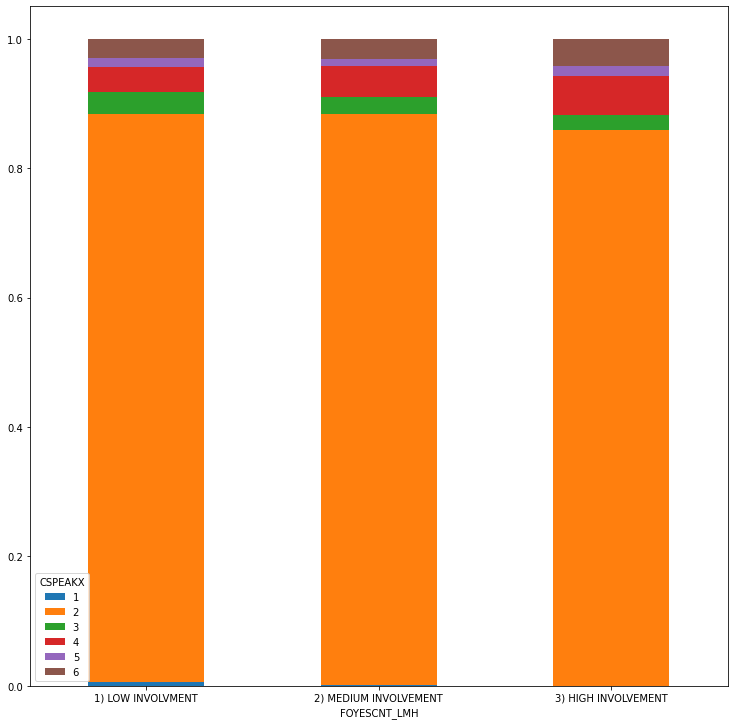

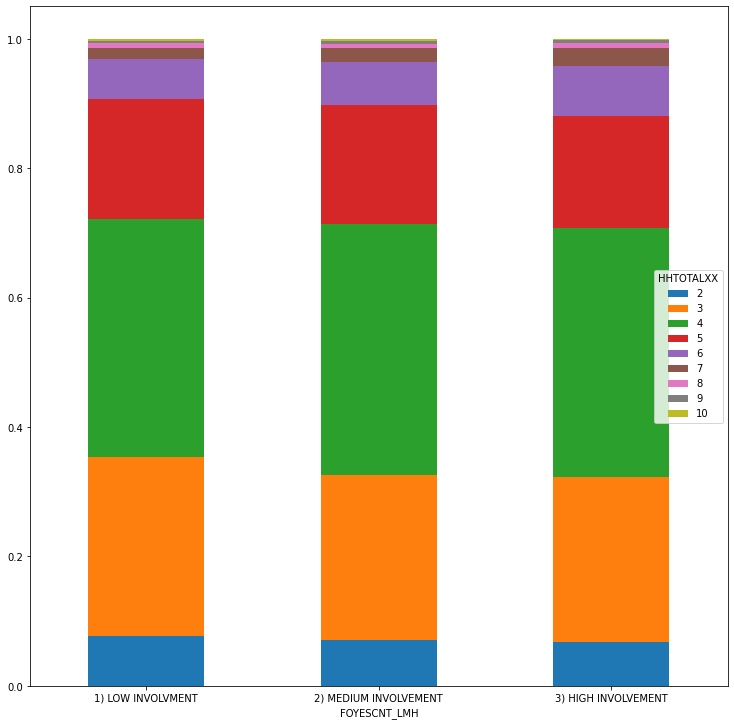

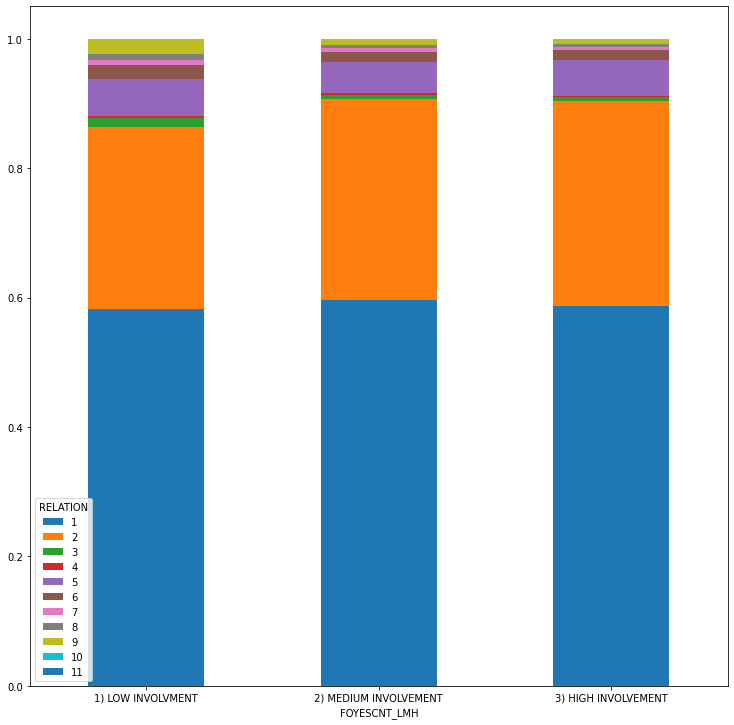

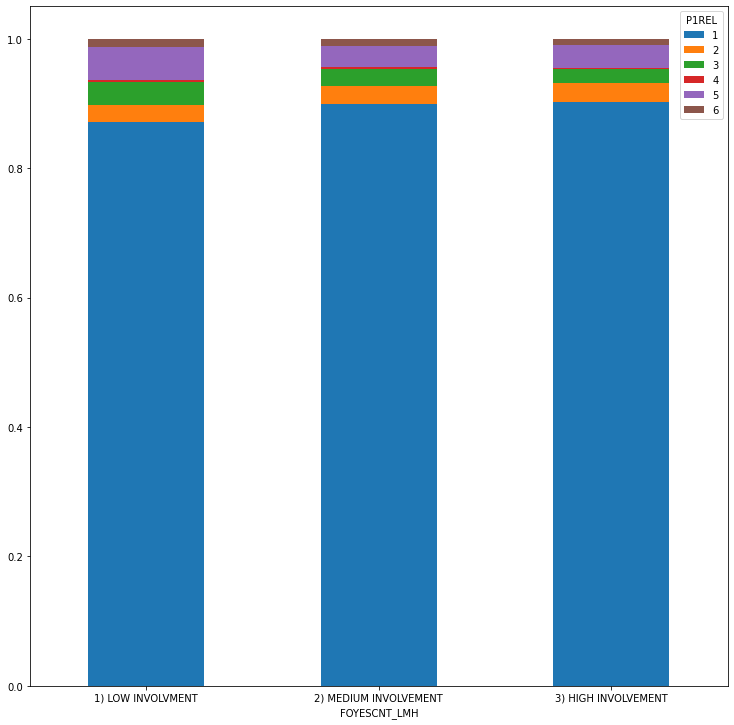

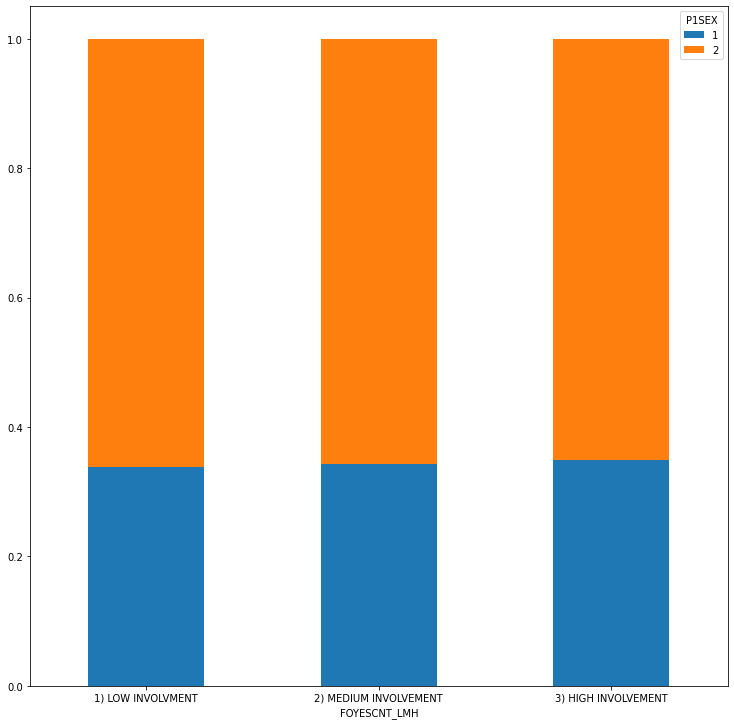

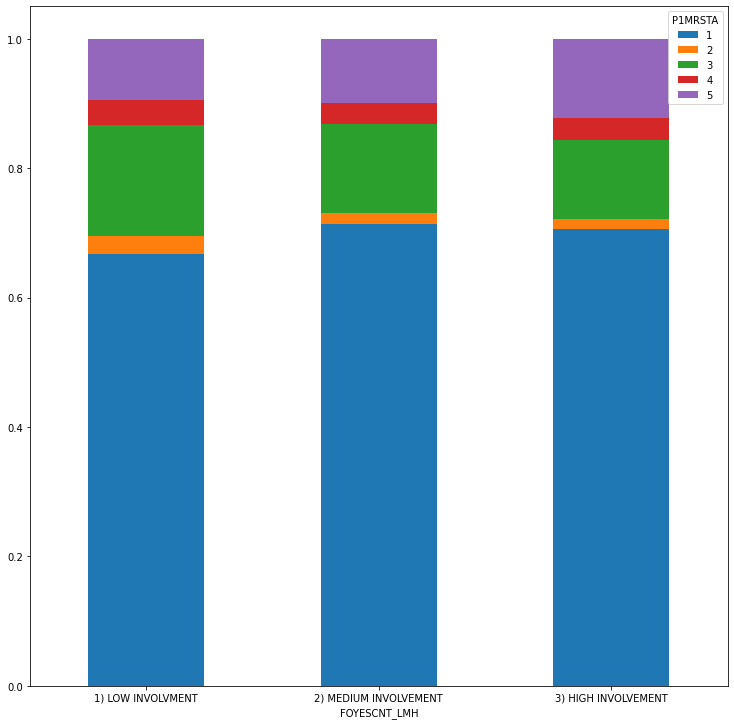

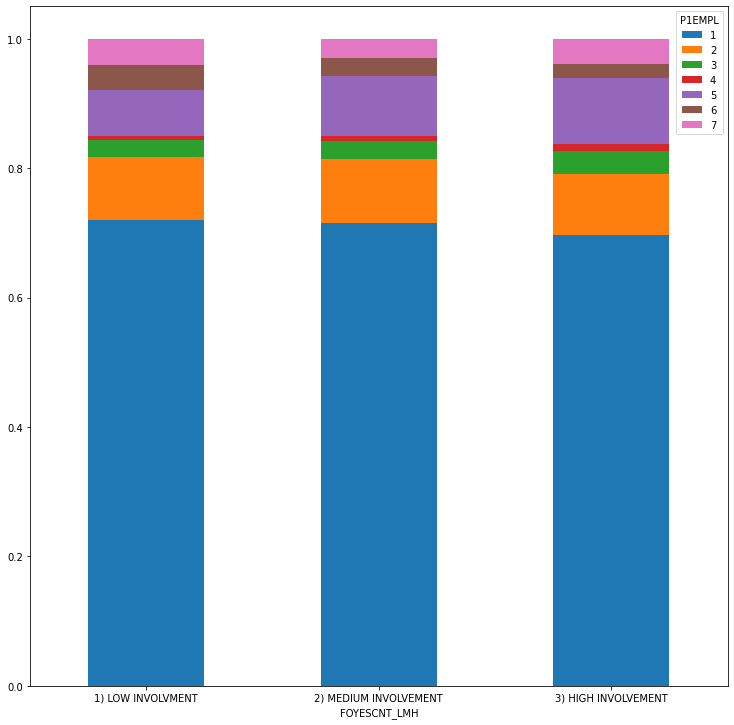

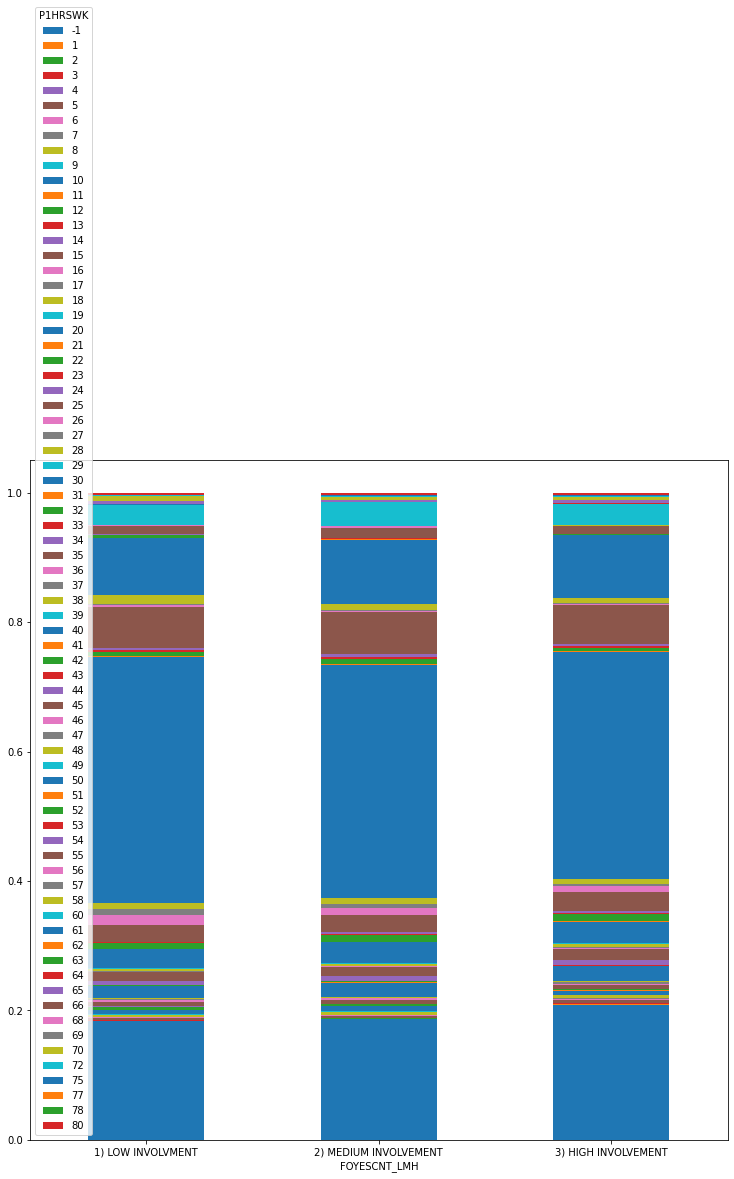

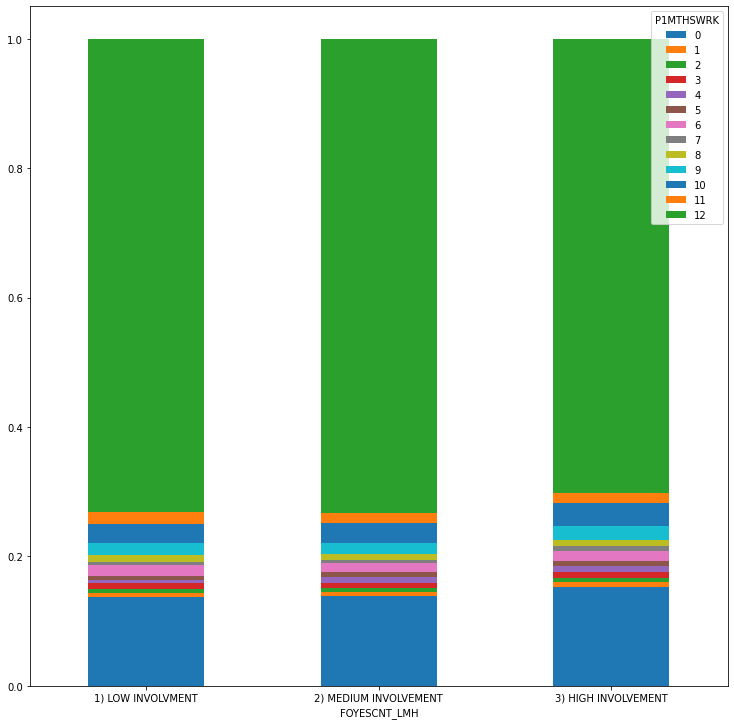

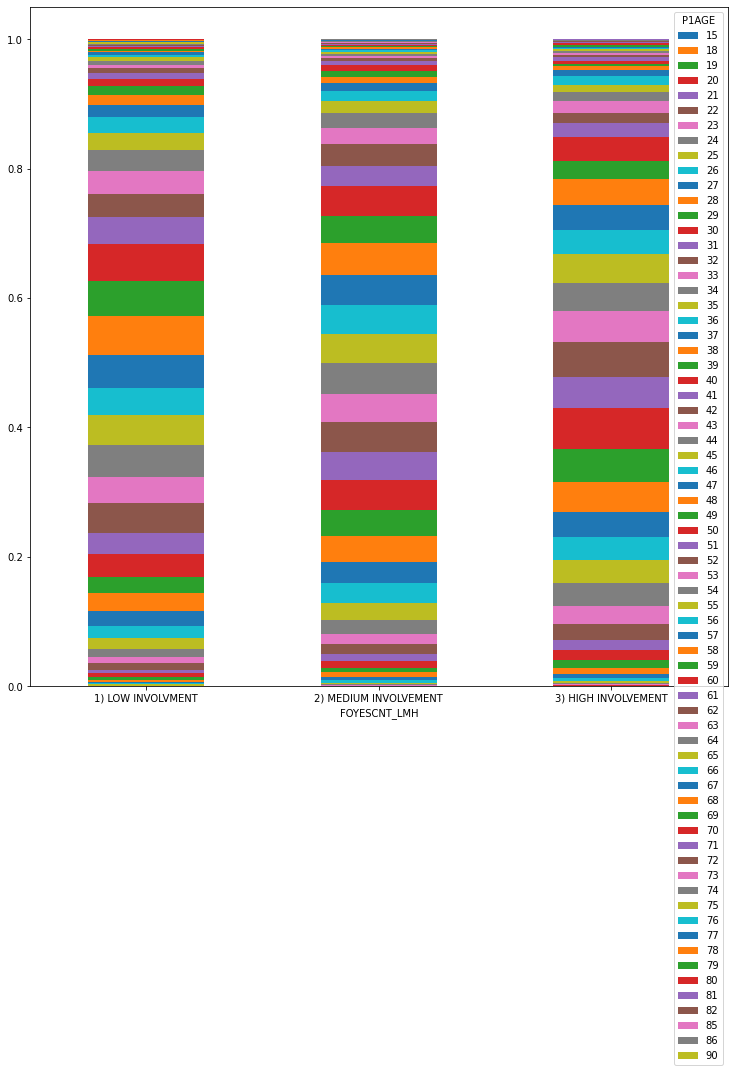

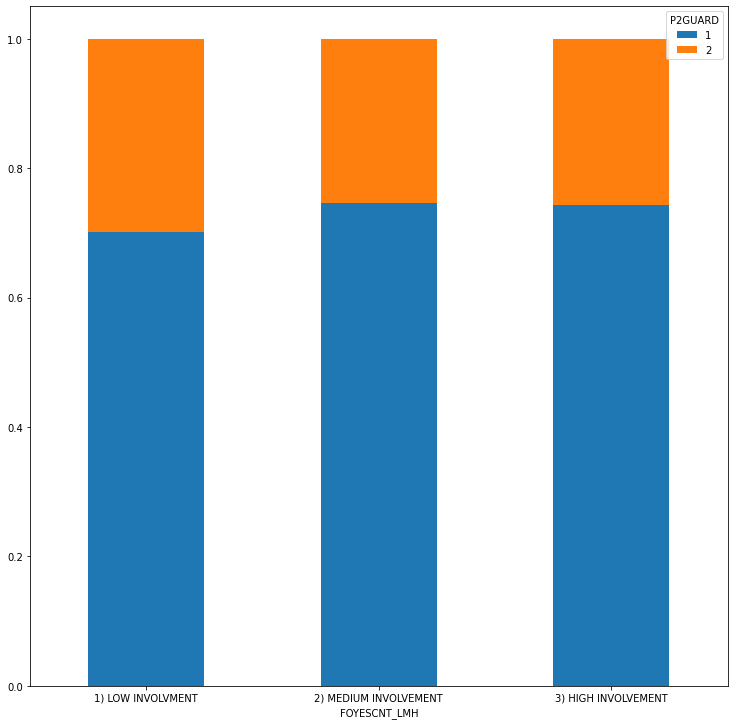

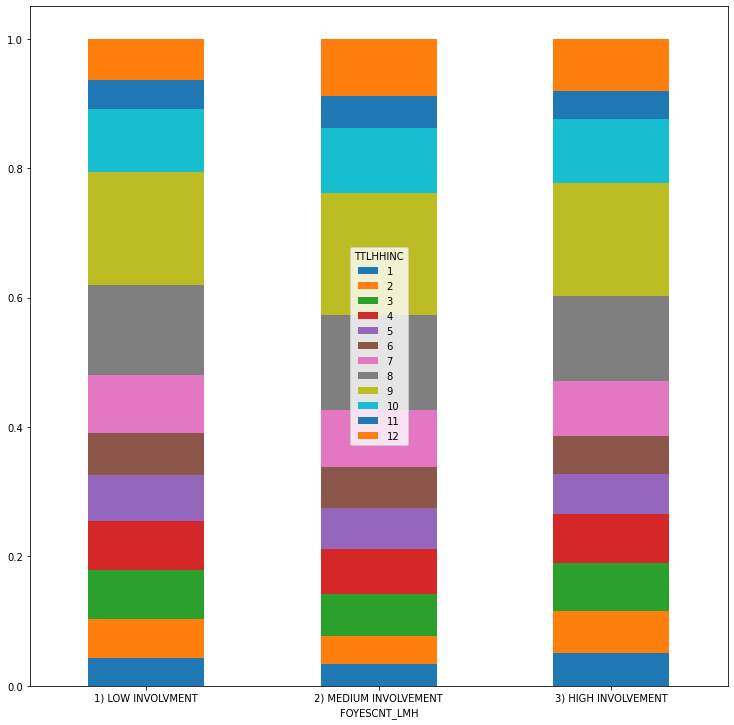

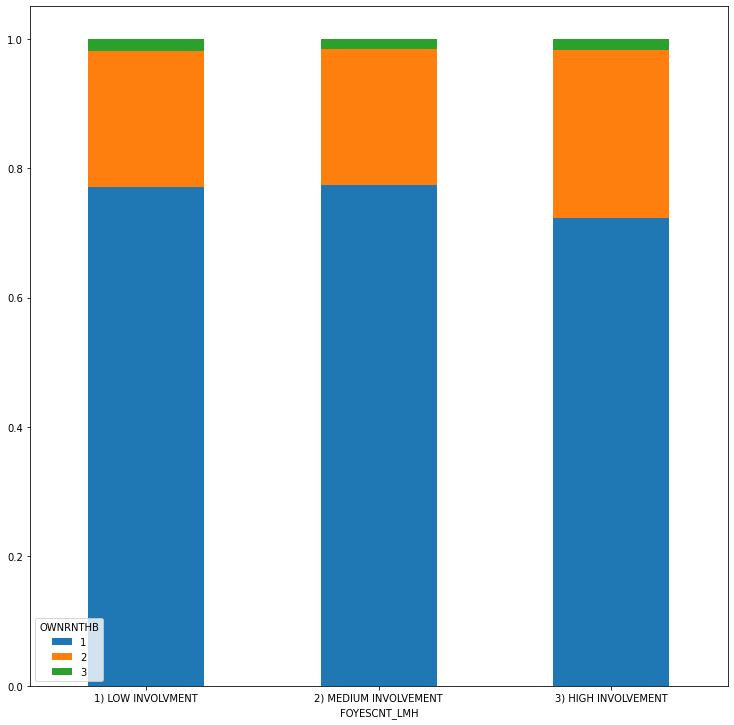

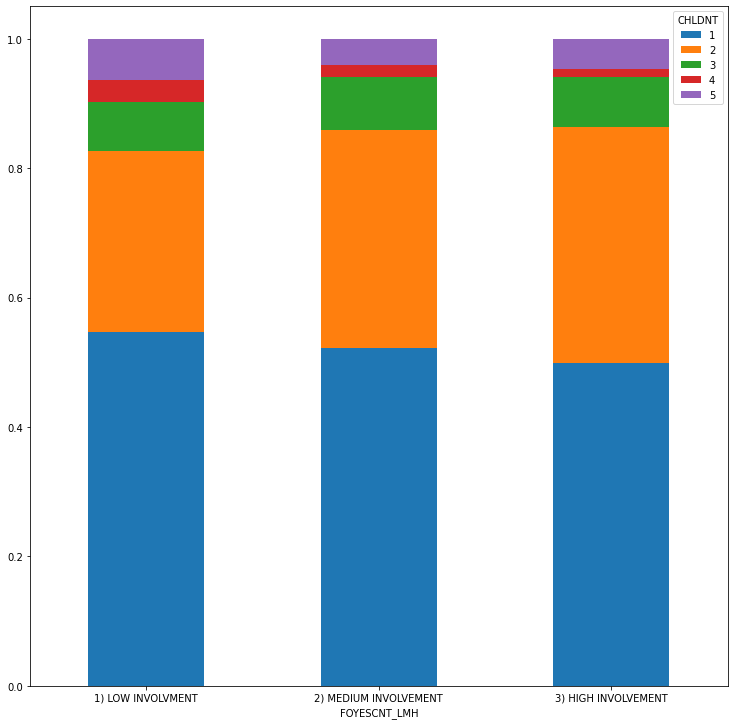

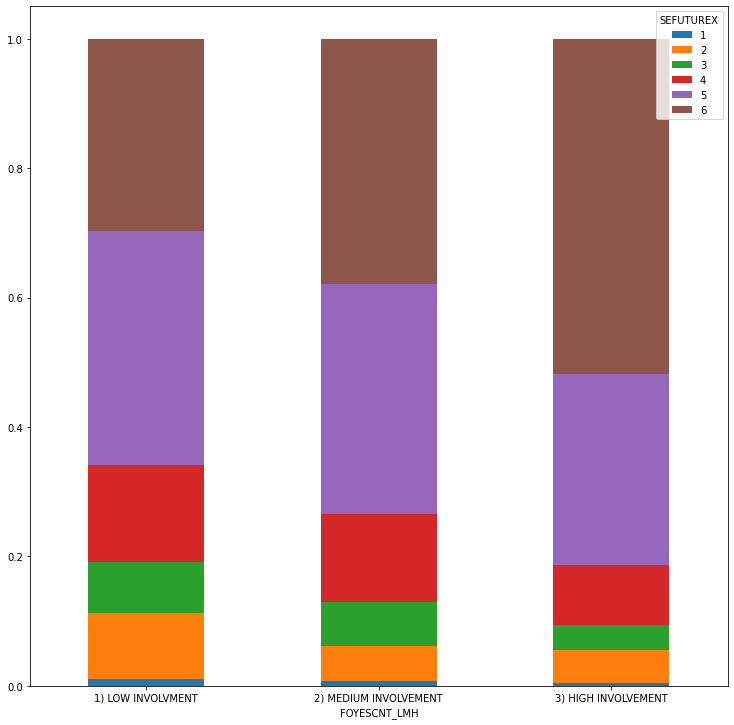

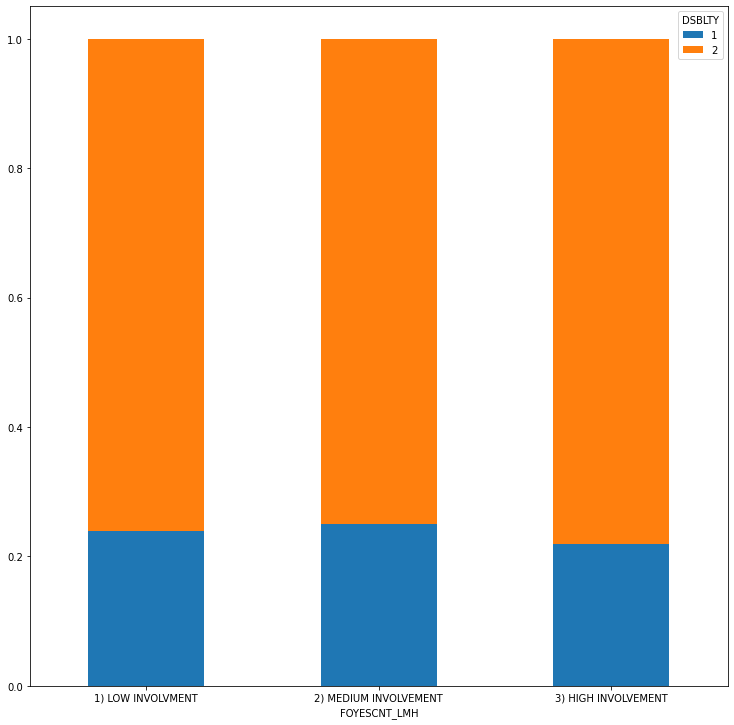

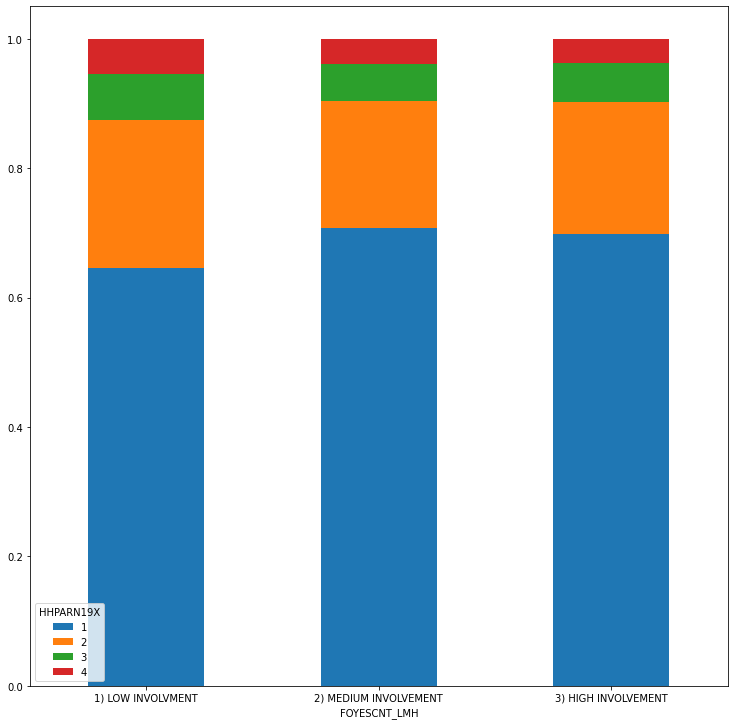

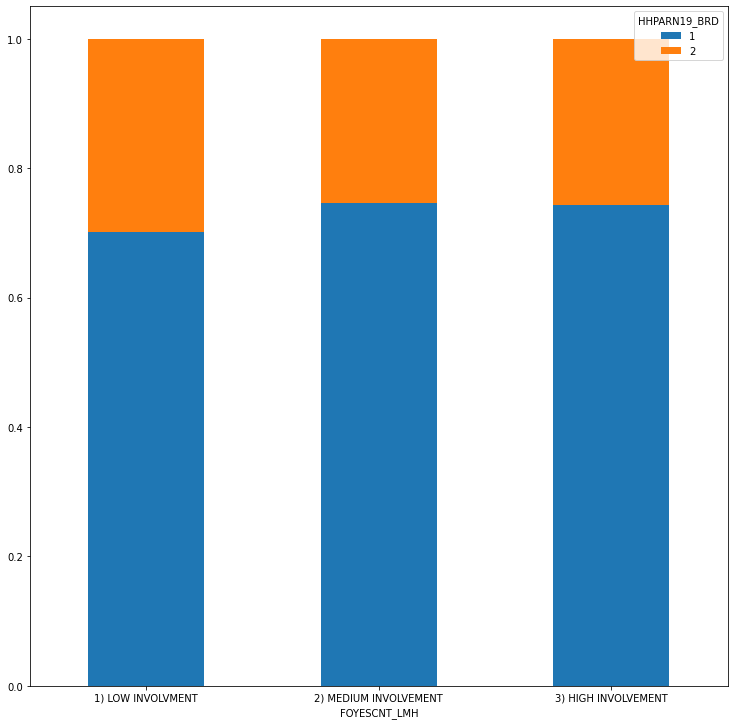

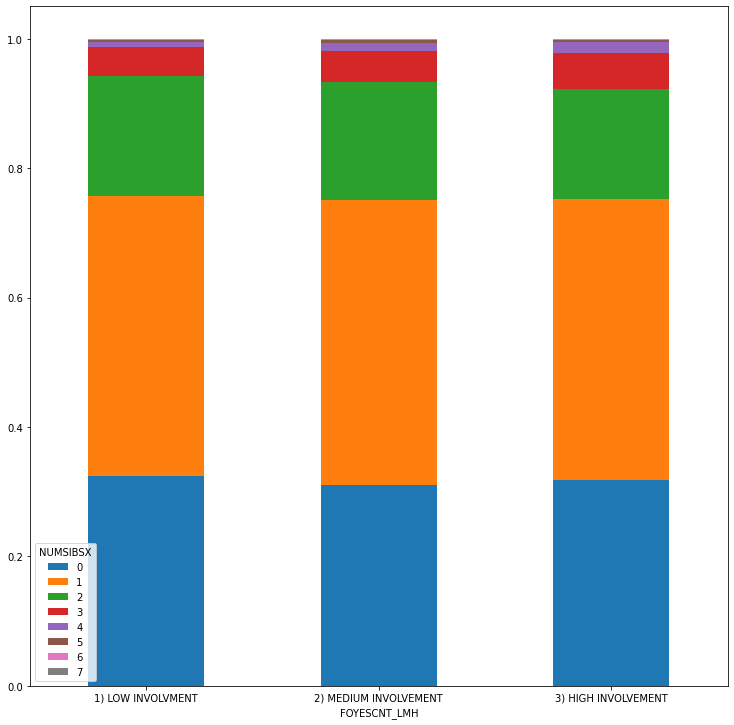

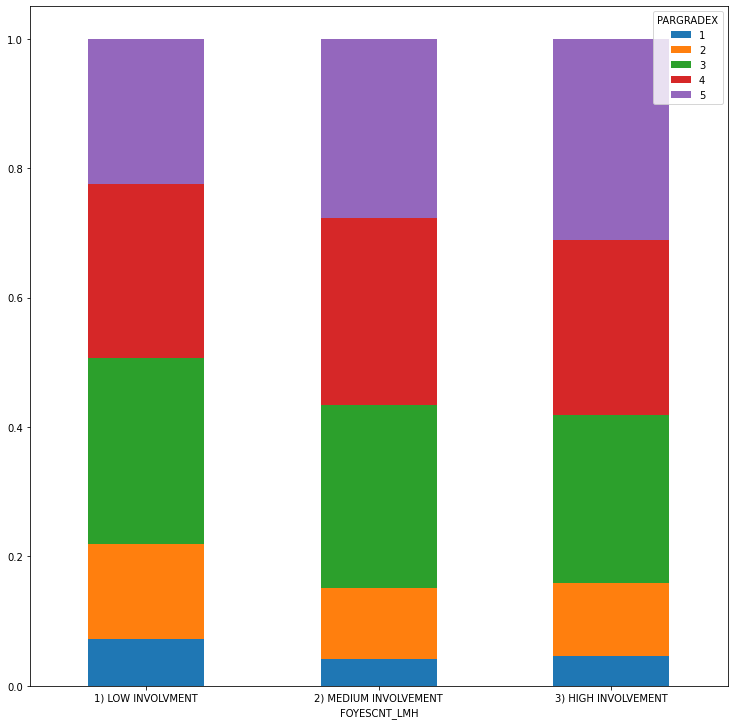

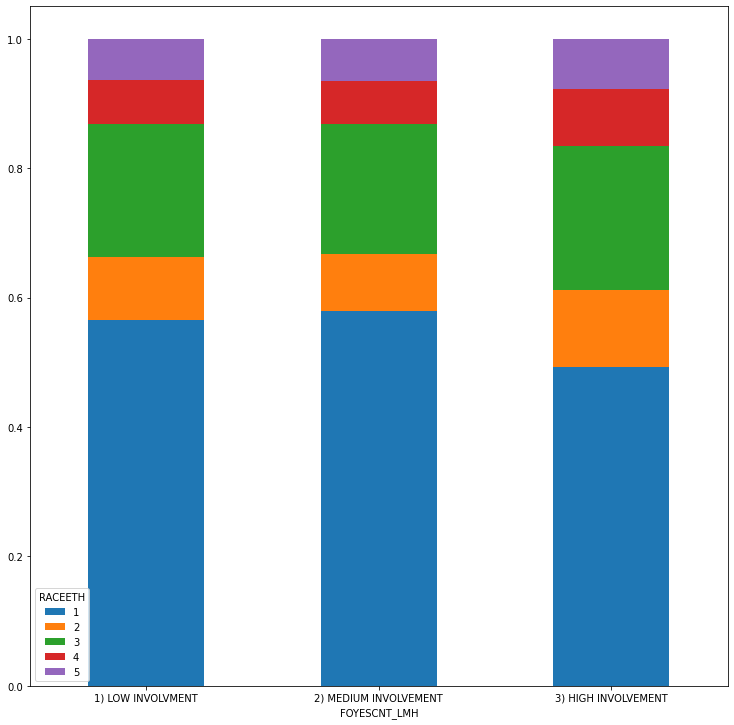

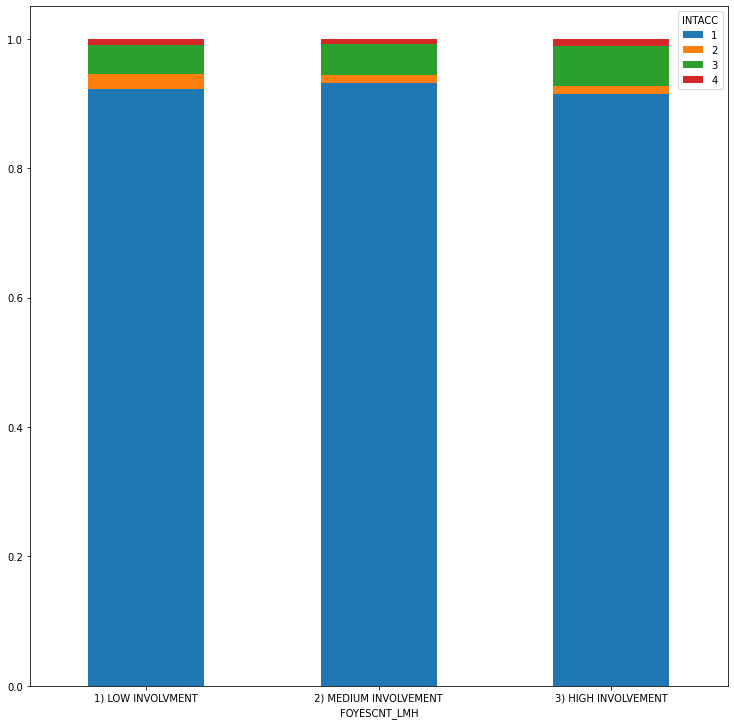

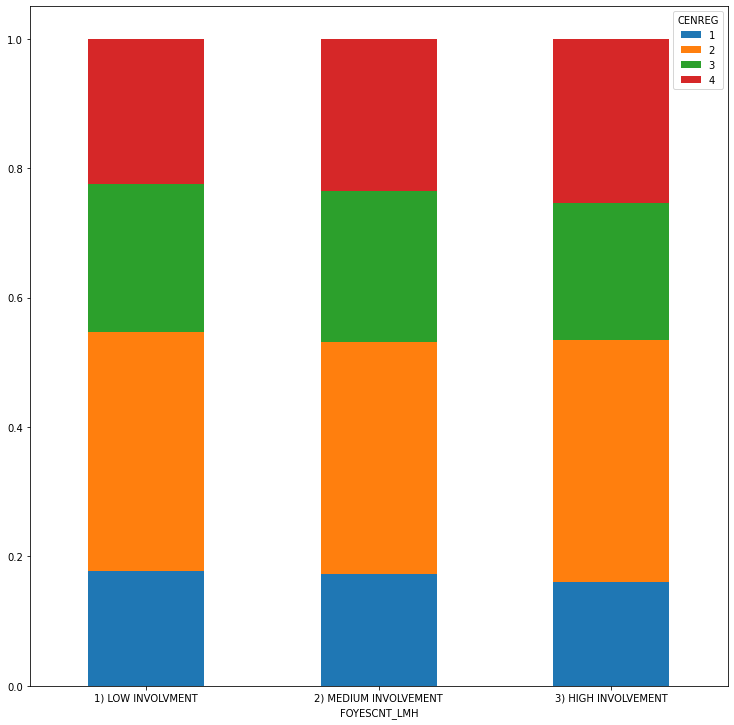

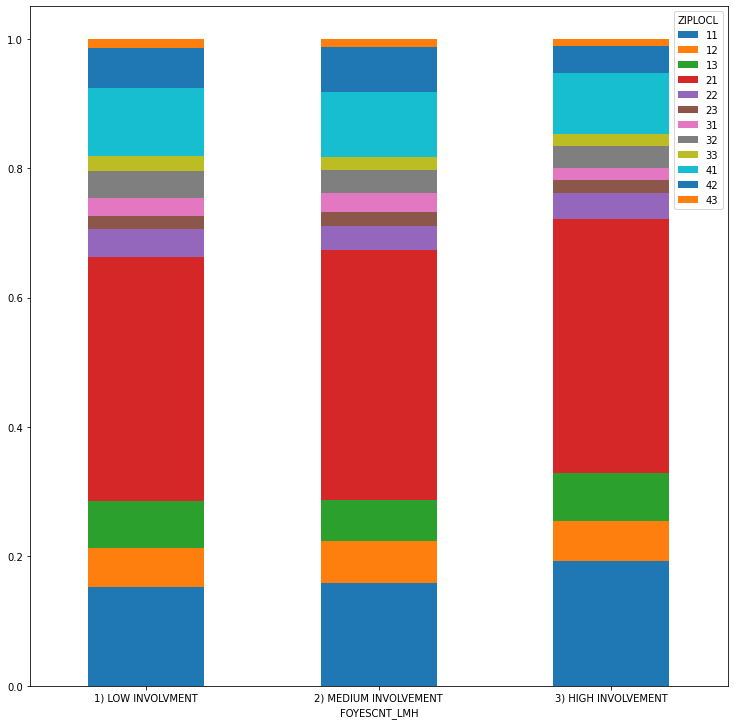

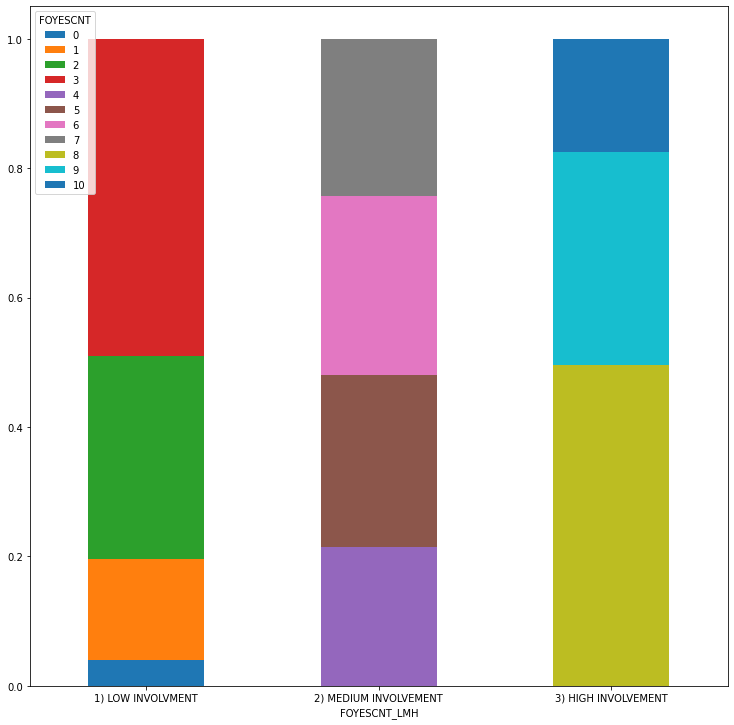

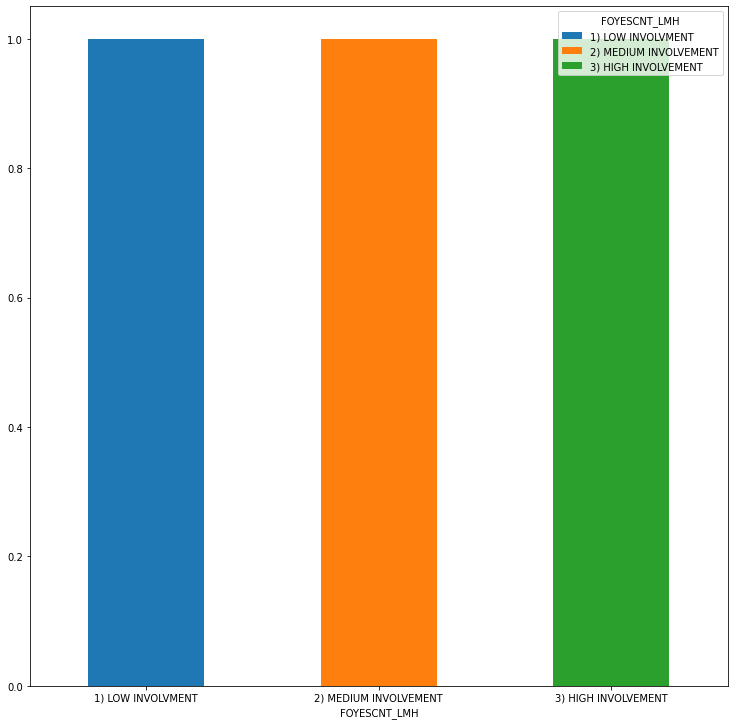

In [ ]:
 #NEED TO FIX
for feature in df:
  crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df[feature], normalize = "index")
  print("")
  crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)
  plt.show()
  plt.close() #Fixes "RunTimeWarning more than 20 figures have been opened"


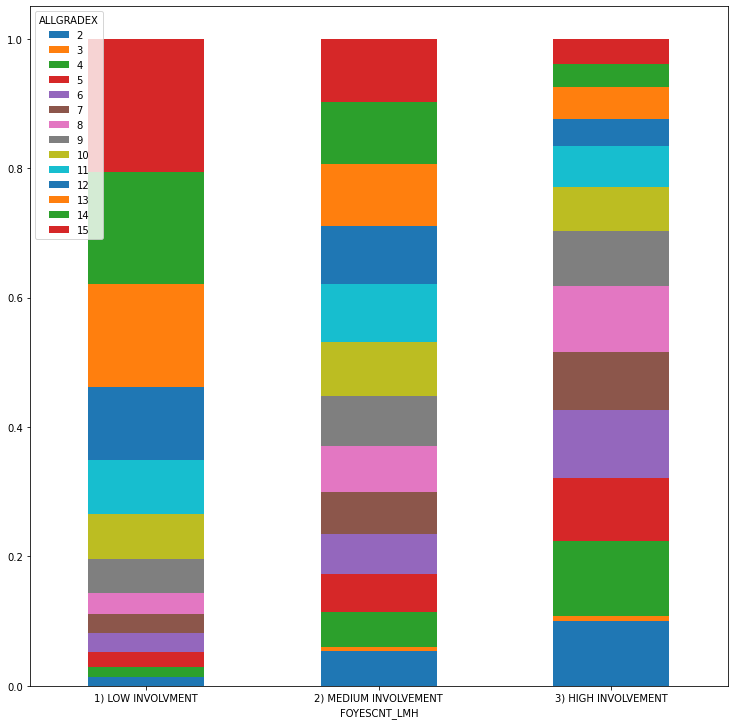

In [ ]:
#ALLGRADEX
#What is this child’s current grade, grade equivalent, or year of school?
crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df.ALLGRADEX, normalize = "index")
barplot = crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)


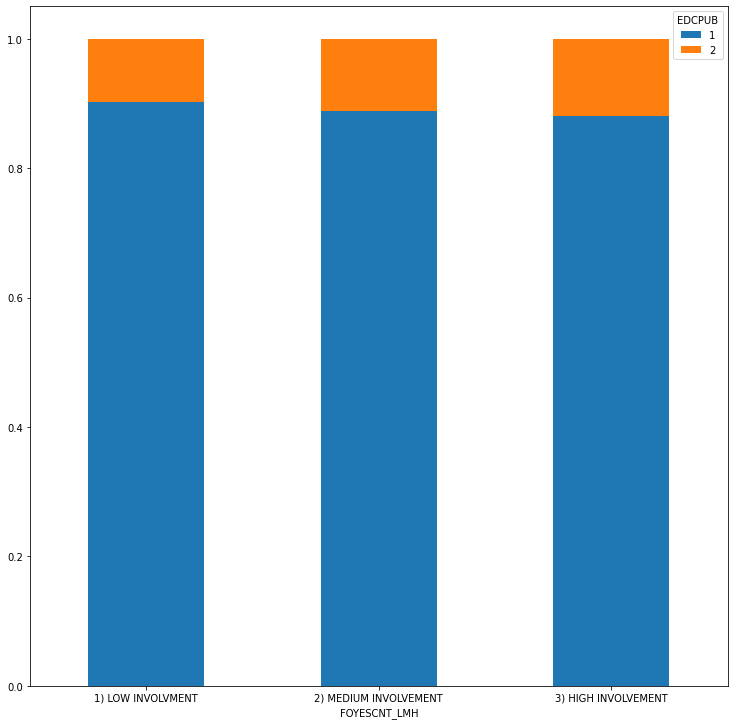

In [ ]:
#EDCPUB
#Does this child attend a public school?
#ALLGRADEX
#What is this child’s current grade, grade equivalent, or year of school?
crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df.EDCPUB, normalize = "index")
barplot = crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)

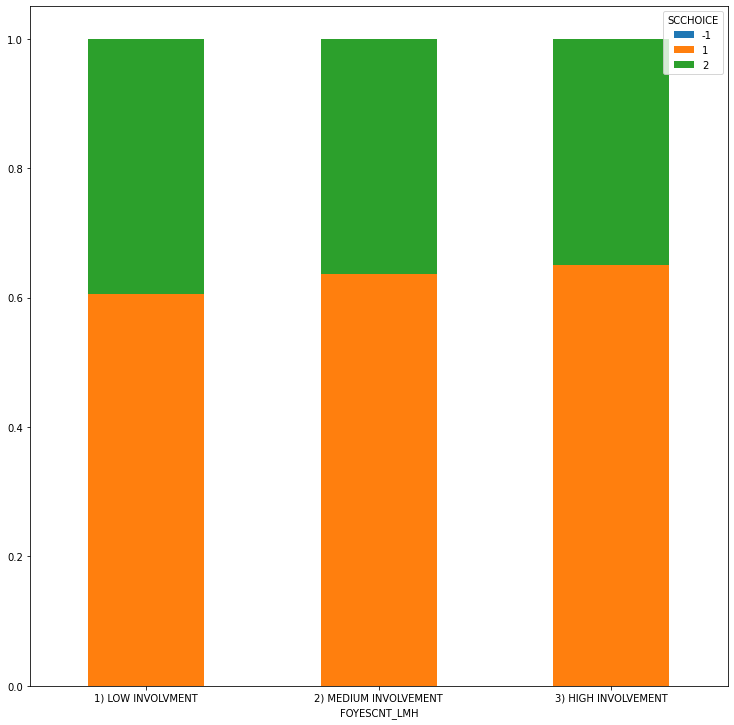

In [ ]:
#SCCHOICE
#Did you feel that you had a choice in which school this child attends?
crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df.SCCHOICE, normalize = "index")
barplot = crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)

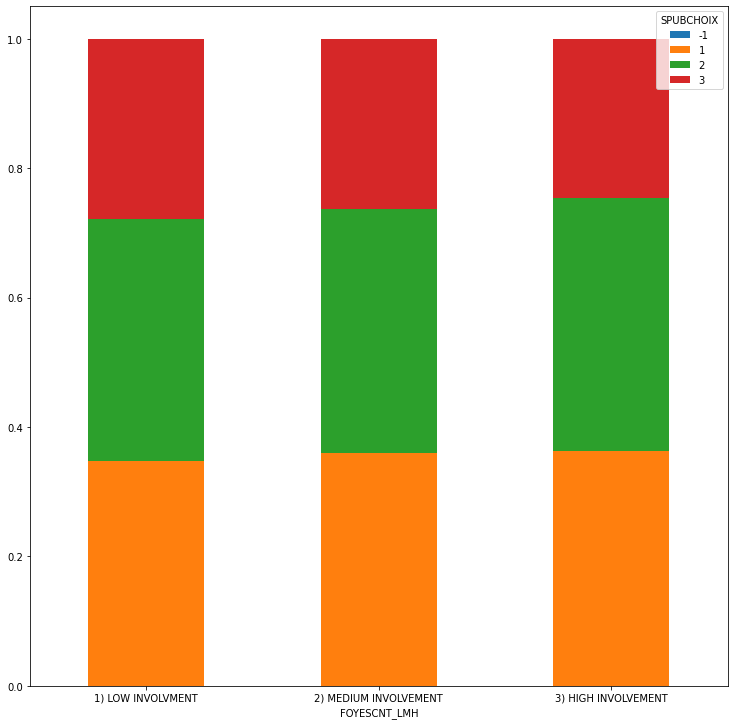

In [ ]:
#SPUBCHOIX
#Does your public school district let you choose which public school you want this child to attend? 
crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df.SPUBCHOIX, normalize = "index")
barplot = crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)

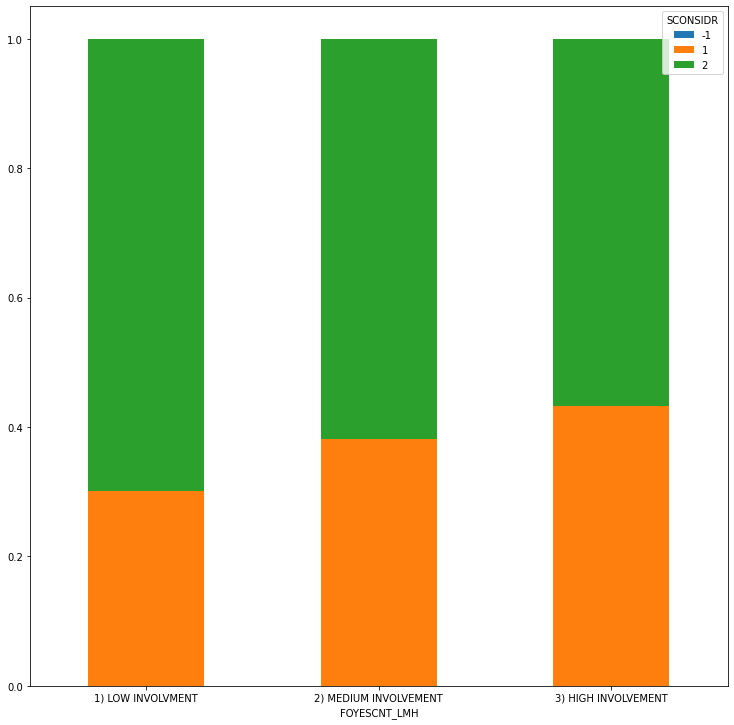

In [ ]:
#SCONSIDR
#Did you consider other schools for this child?
crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df.SCONSIDR, normalize = "index")
barplot = crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)

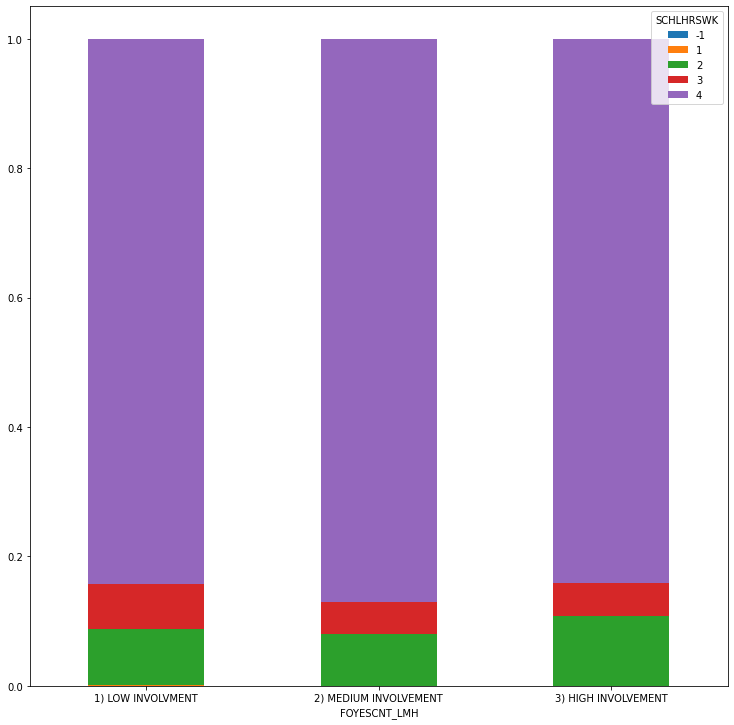

In [ ]:
#SCHLHRSWK
#About how many hours does this child attend a school each week? 
crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df.SCHLHRSWK, normalize = "index")
barplot = crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)

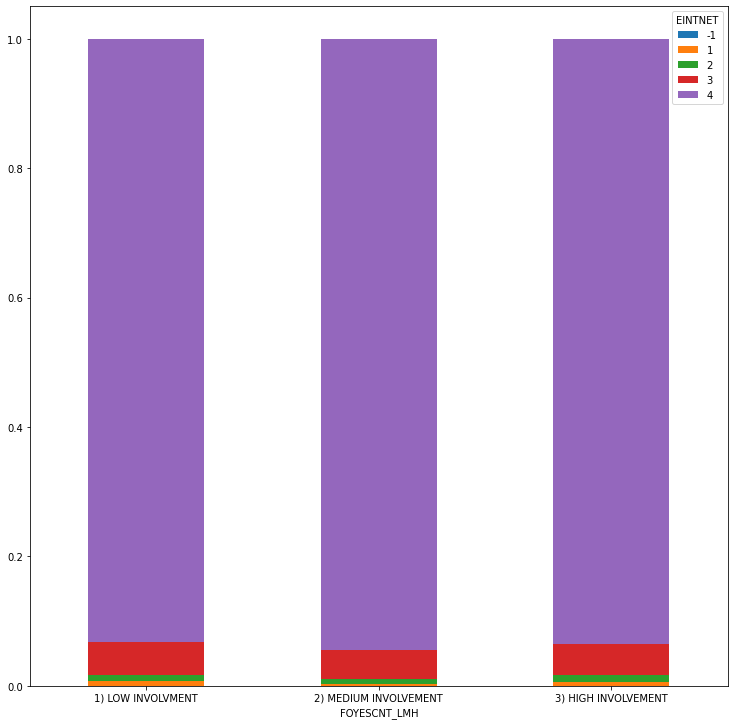

In [ ]:
#EINTNET
#Child enrolled in online, virtual or cyber courses
crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df.EINTNET, normalize = "index")
barplot = crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)


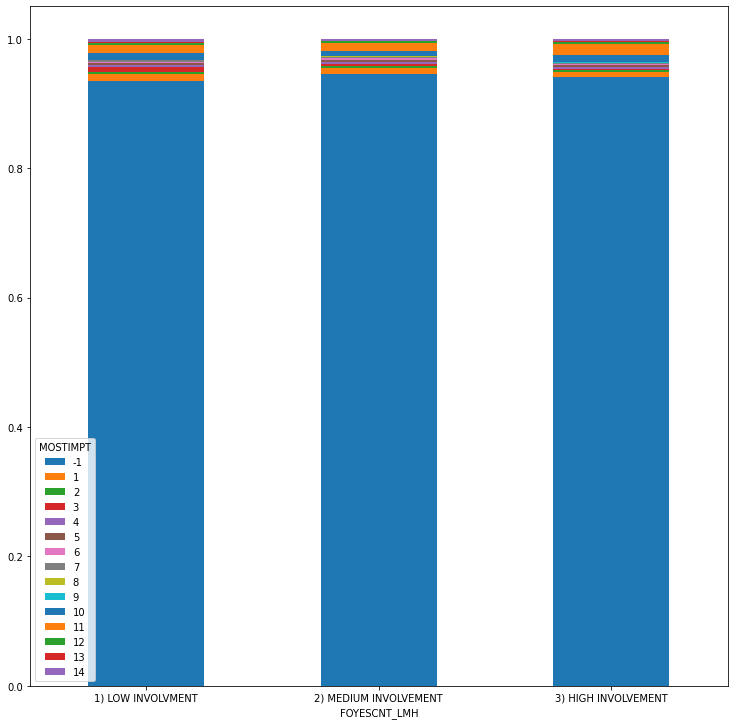

In [ ]:
# MOSTIMPT
# Of the reasons that this child is enrolled in online, virtual, or cyber courses, which one would you say is the most important to you? 
crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df.MOSTIMPT, normalize = "index")
barplot = crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)

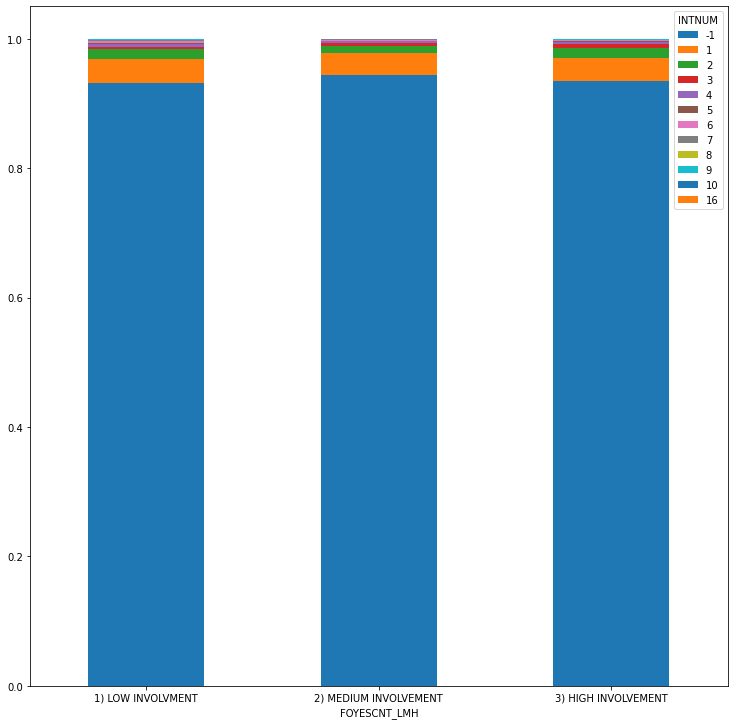

In [ ]:
# INTNUM
# How many online, virtual, or cyber courses does this child take?
crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df.INTNUM, normalize = "index")
barplot = crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)

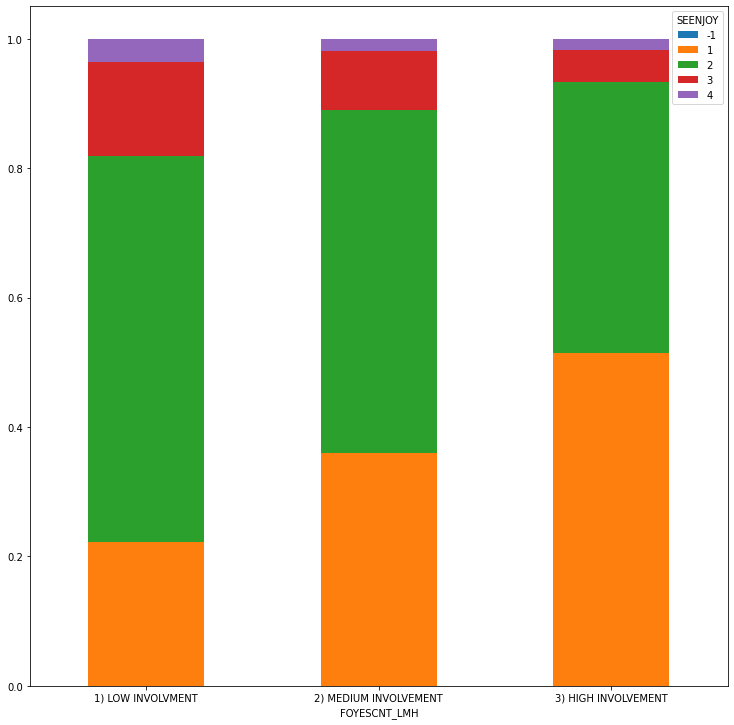

In [ ]:
#SEENJOY
#Question: How much do you agree or disagree with the following statement: “This child enjoys school.”
#Legend:  1  <- Strongly agree
#Legend:  2  <- Agree
#Legend:  3  <- Disagree
#Legend:  4  <- Strongly disagree

#Question: How many times did you say 'Yes' to FO questions (ITEMS 72-74)
#Legend:  Number of 'Yes'

#crosstb = pd.crosstab(df.FOYESCNT, df.SEENJOY, normalize="index")
#barplot = crosstb.plot.bar(rot=0, figsize=(12.5,12.5), stacked = True)

crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df.SEENJOY, normalize = "index")
barplot = crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)


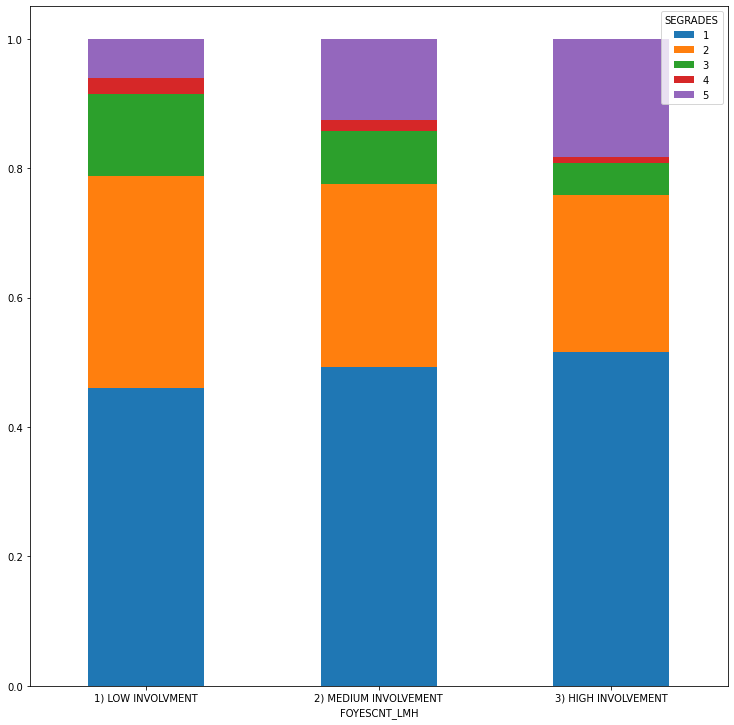

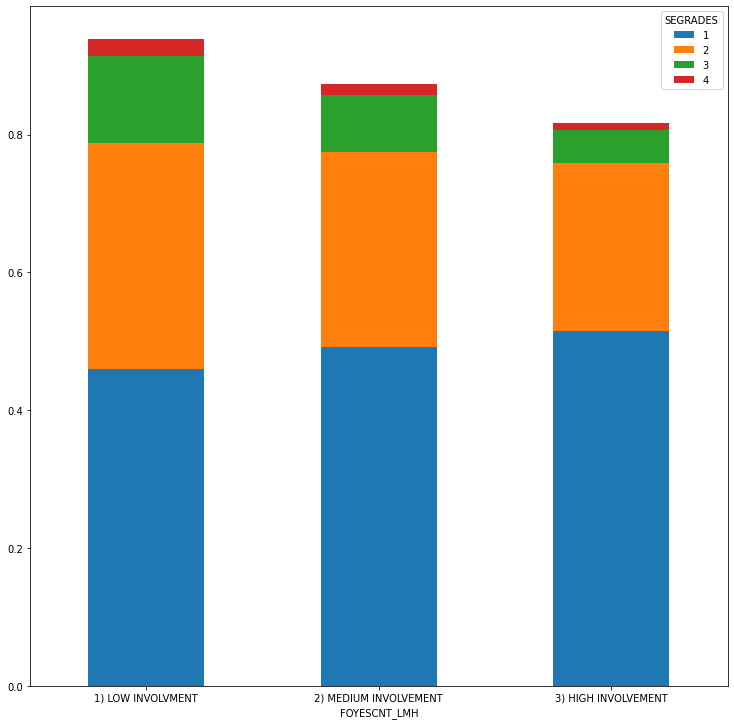

In [ ]:
#SEGRADES
#Question: Please tell us about this child’s grades during this school year. Overall, across all subjects, what grades does this child get?
#Legend:  1 <- Mostly A's
#Legend:  2 <- Mostly B's
#Legend:  3 <- Mostly C's
#Legend:  4 <- Mostly D's or lower
#Legend:  5 <- School does not give grades

#Question: How many times did you say 'Yes' to FO questions (ITEMS 72-74)
#Legend:  Number of 'Yes'

crosstb = pd.crosstab(df.FOYESCNT, df.SEGRADES, normalize="index")
#print(crosstb.loc[:,1:5])
#barplot = crosstb.loc[:,0:5].plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)
#barplot = crosstb.loc[:,0:4].plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)

crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df.SEGRADES, normalize = "index")
barplot = crosstb_LMH.loc[:,0:5].plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)
barplot = crosstb_LMH.loc[:,0:4].plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)


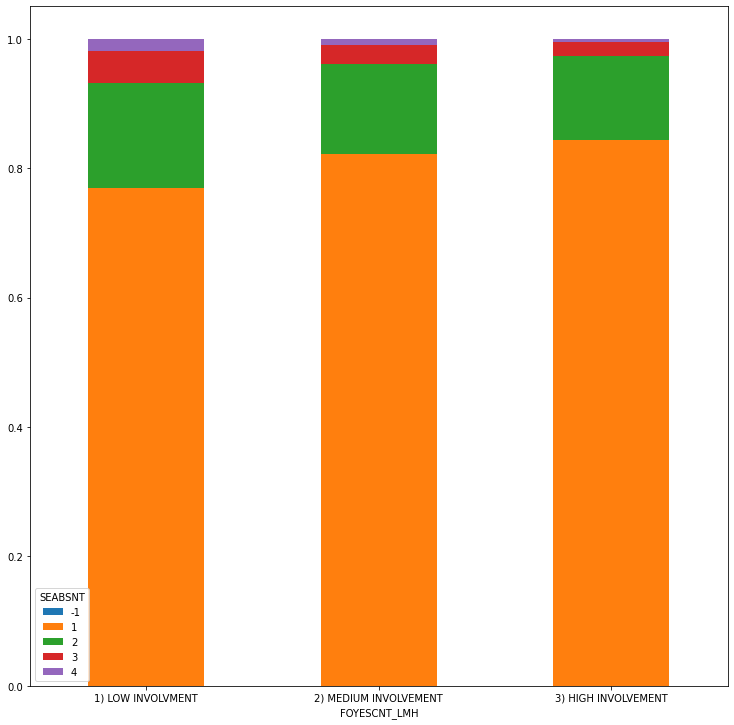

In [ ]:
#SEABSNT
#Question: Since the beginning of this school year, how many days has this child been absent from school?
#Legend:  1 <- 0 to 5 days
#Legend:  2 <- 6 to 10 days
#Legend:  3 <- 11 to 20 days
#Legend:  4 <- More than 2 days (I'm assuming 2 is a typo)

#Question: How many times did you say 'Yes' to FO questions (ITEMS 72-74)
#Legend:  Number of 'Yes'

#crosstb = pd.crosstab(df.FOYESCNT, df.SEABSNT, normalize="index")
#barplot = crosstb.plot.bar(rot=0, figsize=(12.5,12.5), stacked = True)

crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df.SEABSNT, normalize = "index")
barplot = crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)


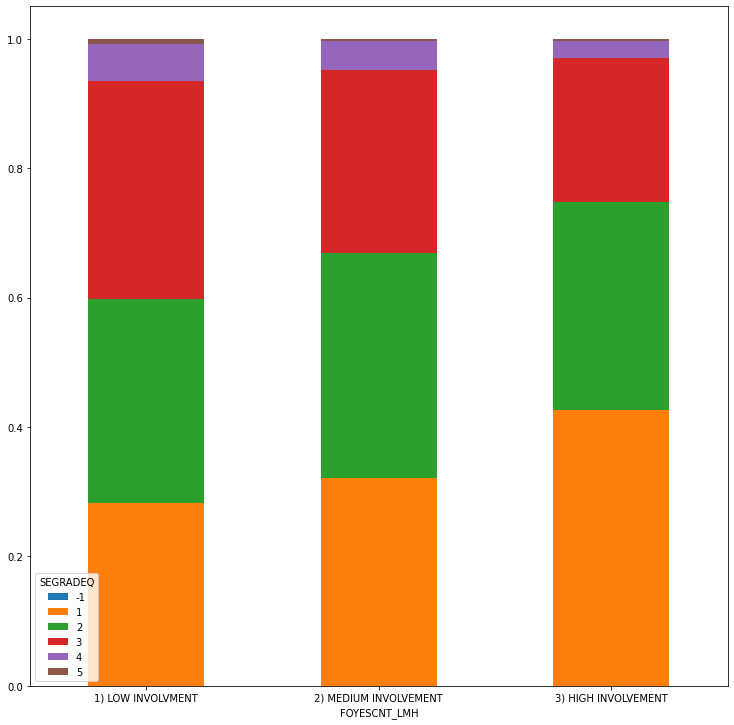

In [ ]:
#SEGRADEQ
#How would you describe his or her work at school?
crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df.SEGRADEQ, normalize = "index")
barplot = crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)


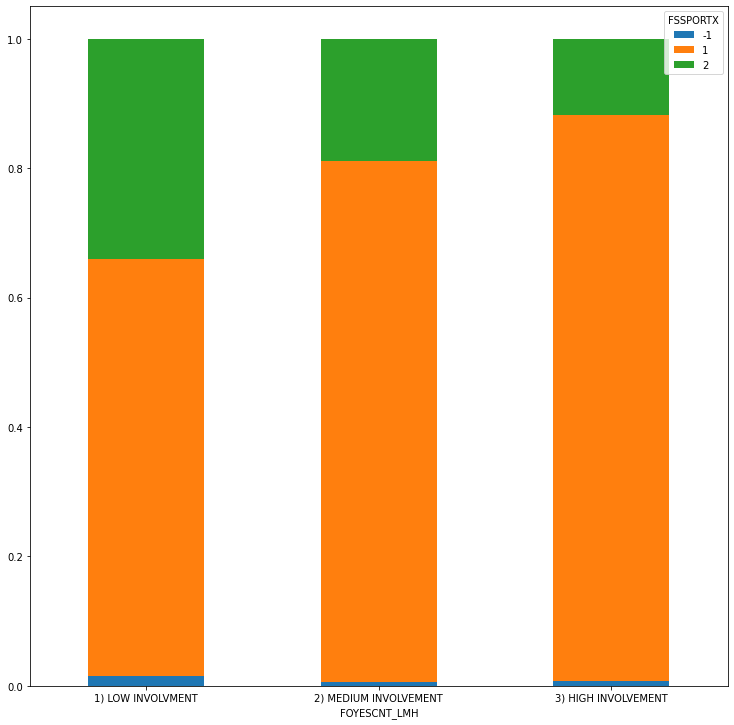

In [ ]:
# FSSPORTX
# Since the beginning of this school year, has any adult in this child’s household Attended a school or class event, 
# such as a play, dance, sports event, or science fair

crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df.FSSPORTX, normalize = "index")
barplot = crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)


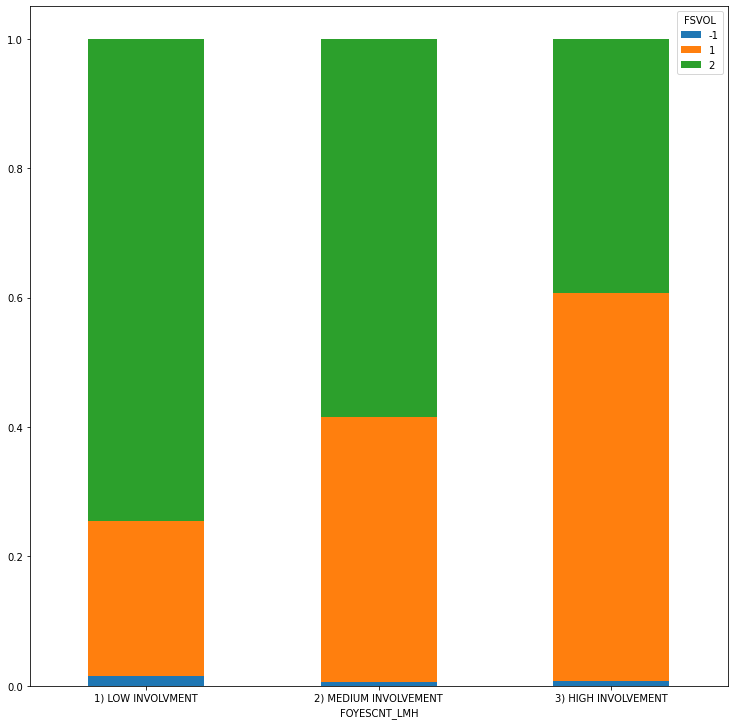

In [ ]:
#FSVOL
# Since the beginning of this school year, has any adult in this child’s household Serve
# as a volunteer in this child’s classroom or elsewhere in the school

crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df.FSVOL, normalize = "index")
barplot = crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)


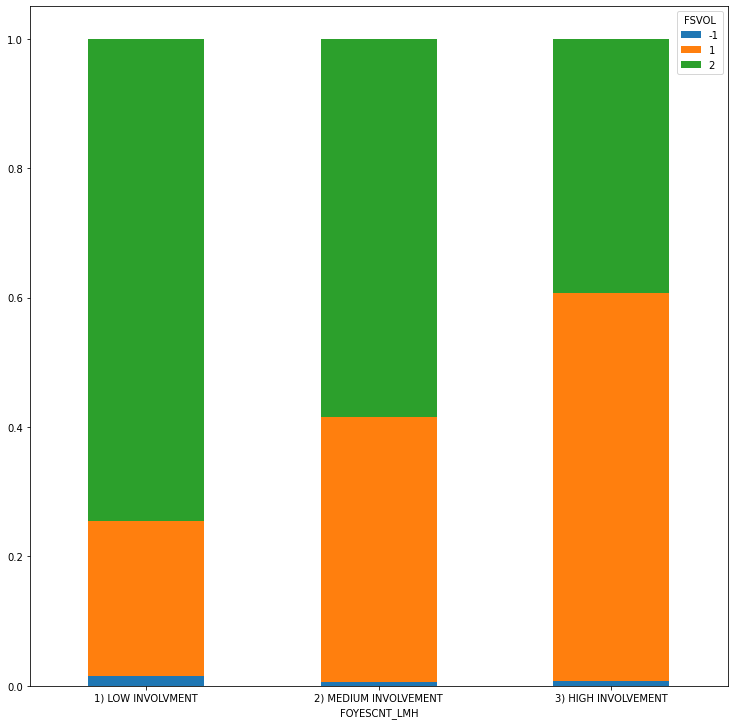

In [ ]:
# FSMTNG
# Since the beginning of this school year, has any adult in this child’s household Attended a general school meeting,
# for example, an open house, or a back-to-school night
crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df.FSVOL, normalize = "index")
barplot = crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)


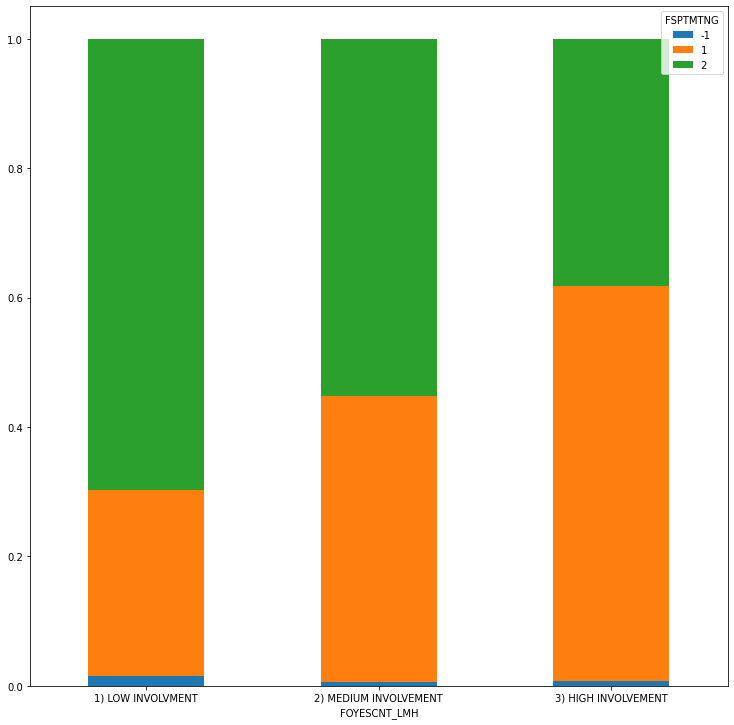

In [ ]:
# FSPTMTNG
# Since the beginning of this school year, has any adult in this child’s household Attended a meeting of the parent-teacher organization or association
crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df.FSPTMTNG, normalize = "index")
barplot = crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)



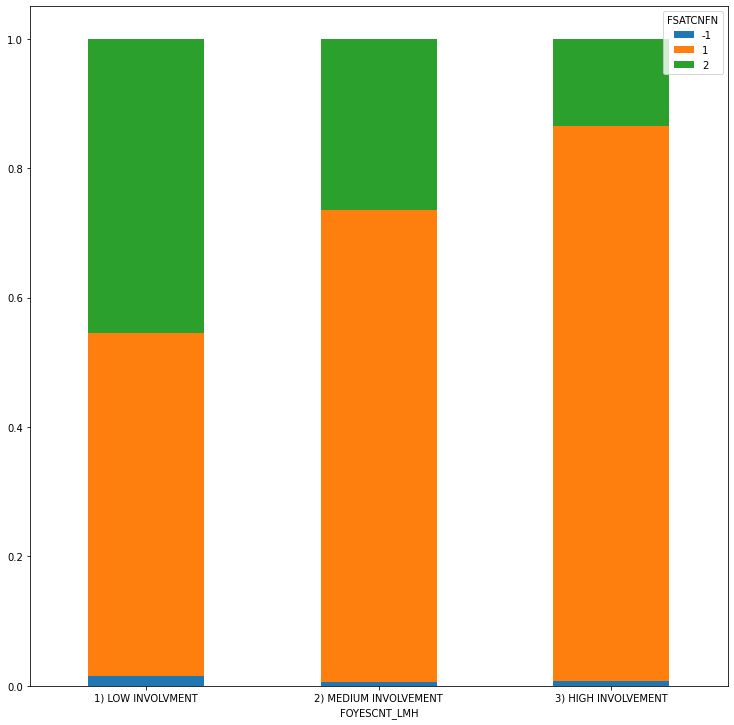

In [ ]:
# FSATCNFN
# Since the beginning of this school year, has any adult in this child’s household Gone to a regularly scheduled parent-teacher conference
# with this child's teacher
crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df.FSATCNFN, normalize = "index")
barplot = crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)



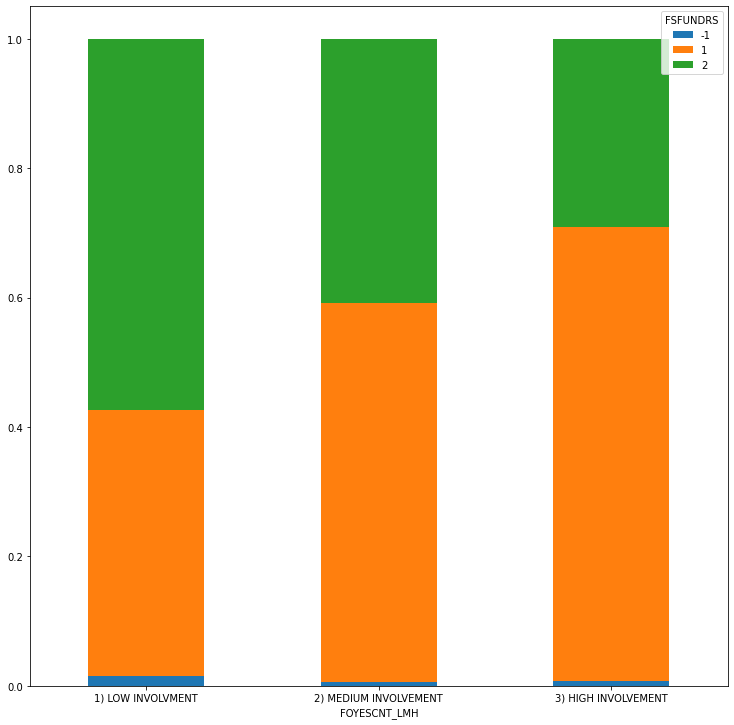

In [ ]:
# FSFUNDRS
# Since the beginning of this school year, has any adult in this child’s household Participated in fundraising for the school
crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df.FSFUNDRS, normalize = "index")
barplot = crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)



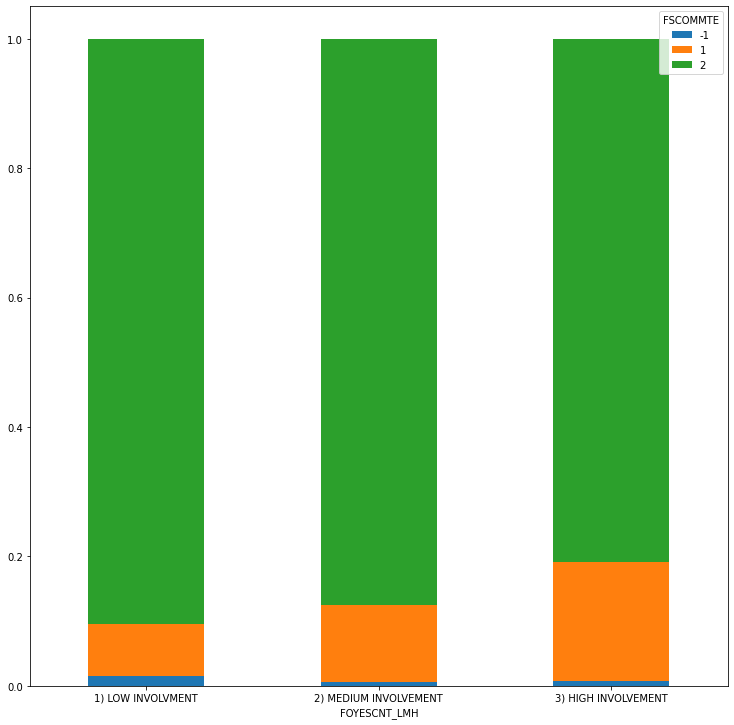

In [ ]:
# FSCOMMTE
# Since the beginning of this school year, has any adult in this child’s household Served on a school committee
crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df.FSCOMMTE, normalize = "index")
barplot = crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)


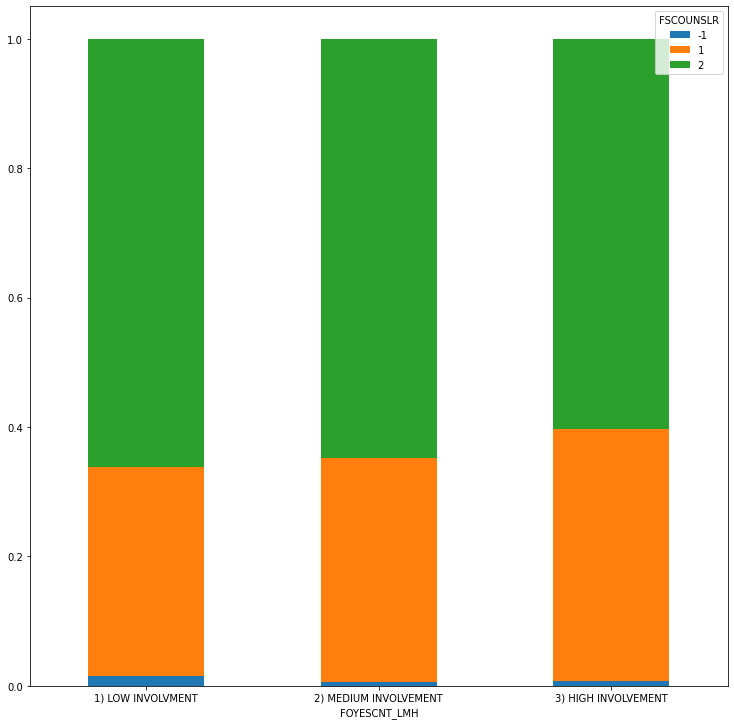

In [ ]:
# FSCOUNSLR
# Since the beginning of this school year, has any adult in this child’s household Met with a guidance counselor in person
crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df.FSCOUNSLR, normalize = "index")
barplot = crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)


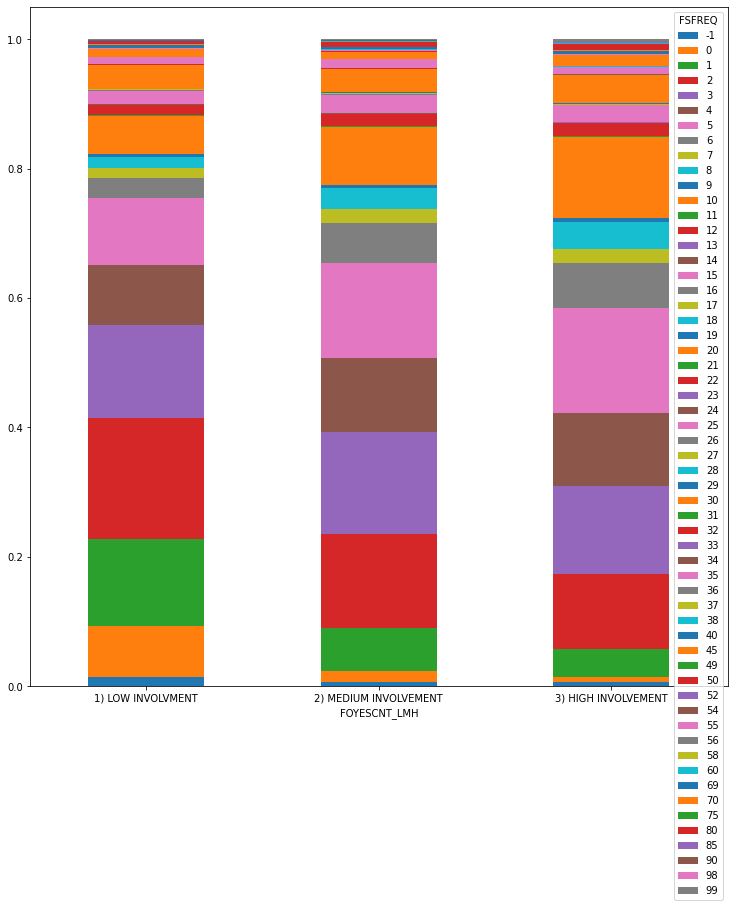

In [ ]:
# FSFREQ
# During this school year, how many times has any adult in the household gone to meetings or participated in activities at this child’s school?
crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df.FSFREQ, normalize = "index")
barplot = crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)


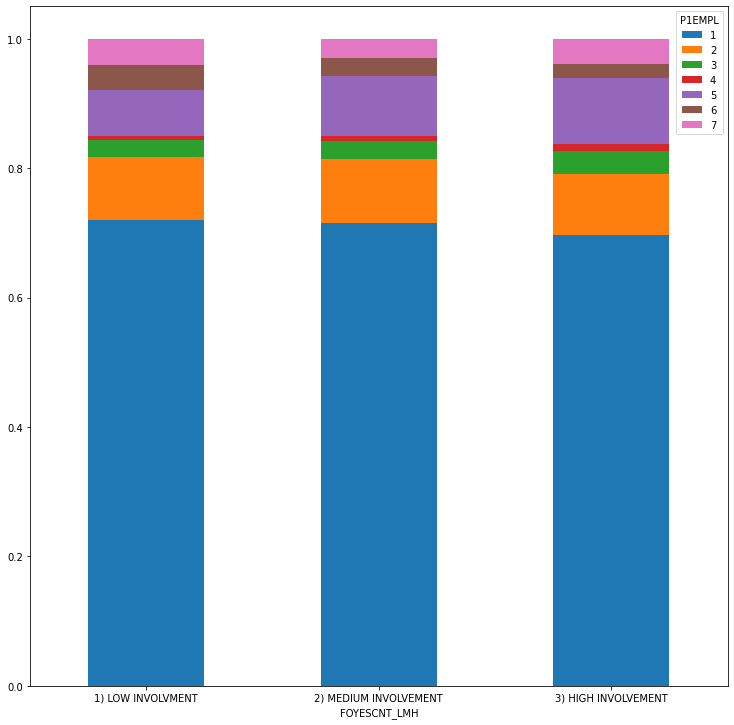

In [ ]:
#P1EMPL
#Question: Which of the following best describes this parent or guardian’s employment status?
#Legend:  1 <- Employed for pay or income
#Legend:  2 <- Self-employed
#Legend:  3 <- Unemployed or out of work
#Legend:  4 <- Full-time student
#Legend:  5 <- Stay at home parent
#Legend:  6 <- Retired
#Legend:  7 <- Disabled or unable to work

#Question: How many times did you say 'Yes' to FO questions (ITEMS 72-74)
#Legend:  Number of 'Yes'

#crosstb = pd.crosstab(df.FOYESCNT, df.P1EMPL, normalize="index")
#barplot = crosstb.plot.bar(rot=0, figsize=(12.5,12.5), stacked = True)

crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df.P1EMPL, normalize = "index")
barplot = crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)


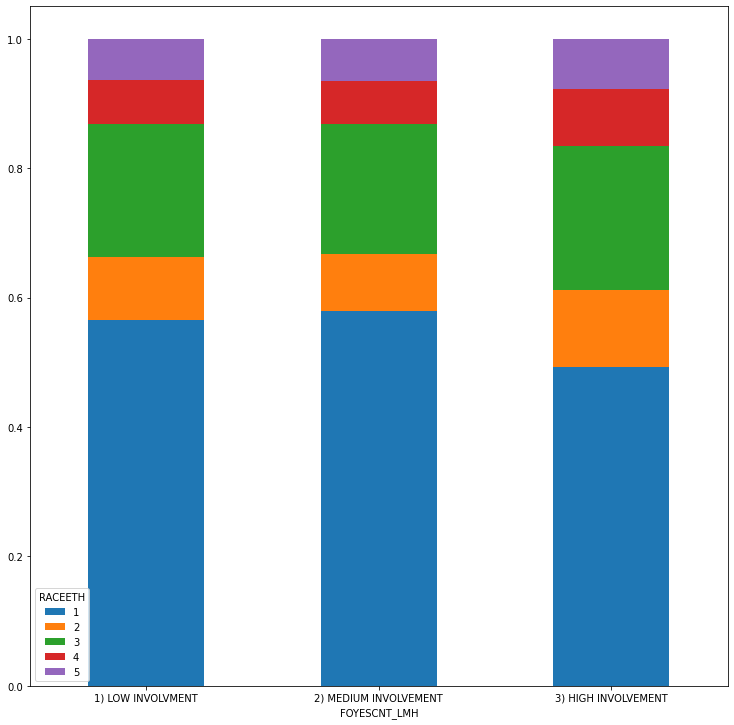

In [ ]:
#Question: Race and ethnicity of child
#Legend:  1 <- White, non-Hispanic
#Legend:  2 <- Black, non-Hispanic
#Legend:  3 <- Hispanic
#Legend:  4 <- Asian or Pacific Islander, non-Hispanic
#Legend:  5 <- All other races and multiple races, non-Hispanic

#Question: How many times did you say 'Yes' to FO questions (ITEMS 72-74)
#Legend:  Number of 'Yes'

#crosstb = pd.crosstab(df.FOYESCNT, df.RACEETH, normalize="index")
#barplot = crosstb.plot.bar(rot=0, figsize=(12.5,12.5), stacked = True)

crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df.RACEETH, normalize = "index")
barplot = crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)


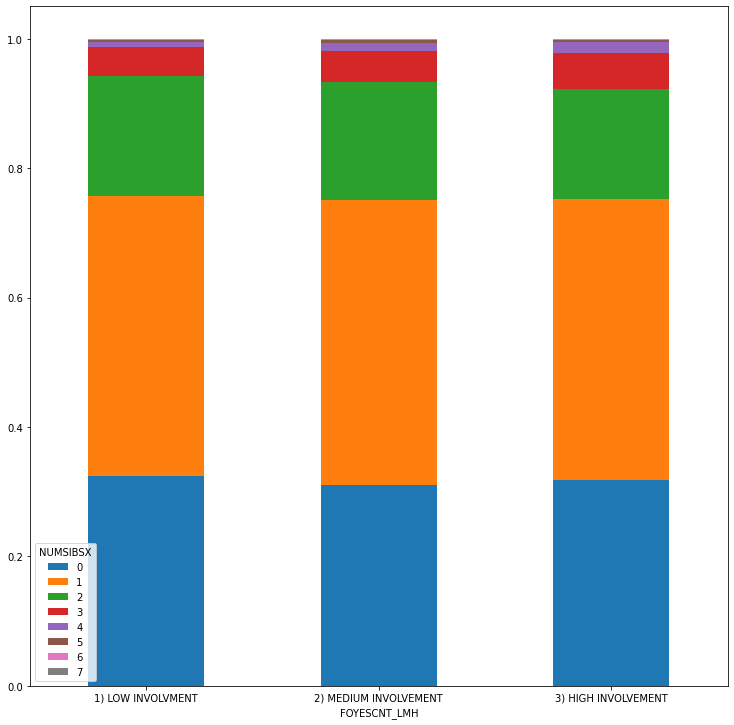

In [ ]:
#Question: Number of child’s siblings
#Legend:  Number of siblings

#Question: How many times did you say 'Yes' to FO questions (ITEMS 72-74)
#Legend:  Number of 'Yes'

#crosstb = pd.crosstab(df.FOYESCNT, df.NUMSIBSX,normalize="index")
#barplot = crosstb.plot.bar(rot=0, figsize=(12.5,12.5), stacked=True)

crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df.NUMSIBSX, normalize = "index")
barplot = crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)


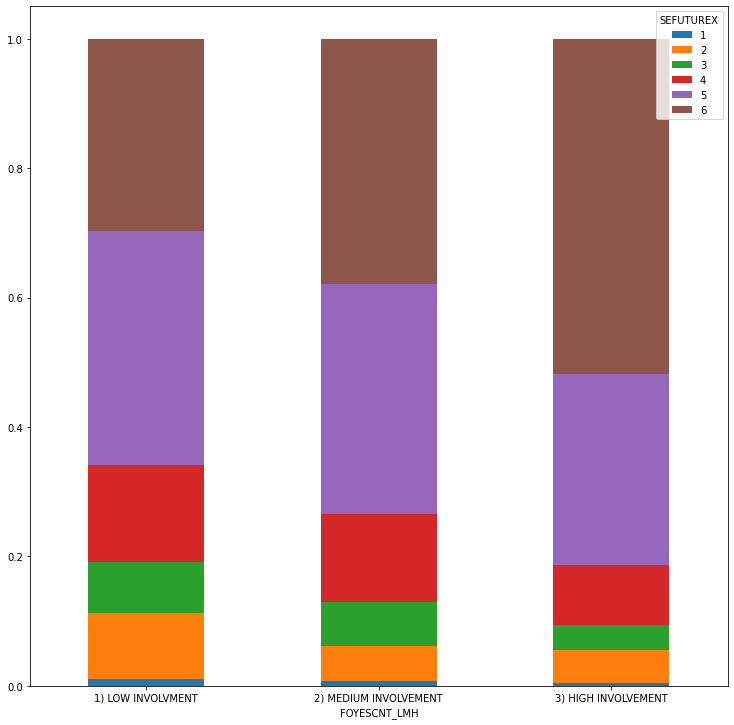

In [ ]:
#SEFUTUREX
#Question: How far do you expect this child to go in his or her education?
#Legend:  1  <- Complete less than a high school diploma
#Legend:  2  <- Graduate from high school
#Legend:  3  <- Attend a vocational or technical school after high school
#Legend:  4  <- Attend two or more years of college
#Legend:  5  <- Earn a Bachelor’s degree
#Legend:  6  <- Earn a graduate degree or professional degree beyond a bachelor’s

#Question: How many times did you say 'Yes' to FO questions (ITEMS 72-74)
#Legend:  Number of 'Yes'

#crosstb = pd.crosstab(df.FOYESCNT, df.SEFUTUREX, normalize="index")
#barplot = crosstb.plot.bar(rot=0, figsize=(12.5,12.5), stacked = True)

crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df.SEFUTUREX, normalize = "index")
barplot = crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)
